[Autoencoders](https://towardsdatascience.com/convolutional-vs-feedforward-autoencoders-for-image-denoising-2fe2e9aed71d)

To try
[Variational autoencoders](https://medium.com/towards-data-science/uncovering-anomalies-with-variational-autoencoders-vae-a-deep-dive-into-the-world-of-1b2bce47e2e9)

Sparse autoencoder

[Box plotly](https://python-charts.com/distribution/box-plot-plotly/)

[Autoencoder2](https://medium.com/@syed_hasan/autoencoders-theory-pytorch-implementation-a2e72f6f7cb7)

[Pytorch](https://medium.com/@vrunda.bhattbhatt/a-step-by-step-guide-to-early-stopping-in-tensorflow-and-pytorch-59c1e3d0e376)

Suggestions to Improve Training and Validation Loss

    Adjust Learning Rate:
        Reduce the initial learning rate: Try starting with a smaller learning rate, such as 0.01 or 0.001, instead of 0.1. This can help the model converge more smoothly and avoid overshooting the optimal solution.
        Use a learning rate scheduler: Implement a learning rate scheduler to dynamically adjust the learning rate during training. Popular schedulers include:
            StepLR: Decreases the learning rate by a factor (gamma) at specific intervals.
            ReduceLROnPlateau: Reduces the learning rate when a metric (e.g., validation loss) stops improving.
            CosineAnnealingLR: Gradually decreases the learning rate following a cosine function.

    Regularization Techniques:
        Increase Dropout: Experiment with higher dropout rates (e.g., 0.6 or 0.7) in your model's layers. This can help prevent overfitting by randomly deactivating neurons during training, forcing the network to learn more robust features.
        Add Weight Decay: Apply weight decay (L2 regularization) to your optimizer. This penalizes large weights, encouraging the model to learn simpler solutions and reducing overfitting. You can adjust the weight decay parameter (e.g., 1e-4 or 1e-5).

    Batch Normalization:
        Add Batch Normalization layers: Consider adding Batch Normalization layers after convolutional or dense layers in your model. Batch Normalization helps stabilize training by normalizing the activations within each mini-batch, leading to faster convergence and better generalization.

    Activation Functions:
        Experiment with different activation functions: While LeakyReLU is a good choice, you can try other activation functions like ELU (Exponential Linear Unit) or SELU (Scaled Exponential Linear Unit), which might offer better performance for your specific task.

    Loss Function:
        Consider other loss functions: While MSE is a common choice for regression tasks, you can explore other loss functions like Huber loss or Smooth L1 loss, which are less sensitive to outliers and might improve training stability.

    Data Preprocessing:
        Scale or normalize the target data: Ensure that your target data (final_target_full) is appropriately scaled or normalized. This can help improve the model's ability to learn and reduce the loss. You can use the same scaler used for input data or apply a separate scaler for the target data.

    Network Architecture:
        Adjust the number of layers and units: Experiment with different network architectures by adding or removing layers, or changing the number of units (neurons) in each layer. Deeper networks can learn more complex features but may require more data and careful tuning to avoid overfitting.
        Try skip connections: Introduce skip connections (like in ResNet) to your network. Skip connections help information flow through the network, allowing it to learn more complex features and improve gradient propagation.

    Increase Training Data:
        If possible, try increasing the amount of training data. More data can help the model generalize better and reduce overfitting. Consider using data augmentation techniques to generate new samples from your existing data.


For Input

X -> Augment -> SPlit(train,val,test) -> Scaling -> Noise -> Clip

For Output

X -> Fourier/Wavelet -> Augment -> Split -> Scaling

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# tf.debugging.set_log_device_placement(True)

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] ='0'

In [ ]:
# !pip install torchsummary

In [ ]:
!pip install Pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 99.7 MB/s eta 0:00:00


#### Import libraries


##### Pytorch libraries

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import drive

from scipy.fft import fft,ifft
from scipy.signal import morlet, cwt
# import pywt
import time
import os
import copy
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import root_mean_squared_error,mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error


In [ ]:
from torchsummary import summary
# from torchinfo import summary
# help(summary)
import torchvision.models as models


##### Tensorflow libraries

In [ ]:
# def import_libraries():
#import library for Conv2dTranspose
from keras.layers import Conv2DTranspose, Conv1DTranspose
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import yfinance as yf
import pickle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Attention, Add, LayerNormalization, Layer
from keras.layers import UpSampling1D,Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tensorflow.keras.callbacks import LearningRateScheduler

# import keras_tuner as kt
# import optuna
# from optuna import Trial, visualization
# from optuna.samplers import TPESampler
# import xgboost as xgb
# import lightgbm as lgb
# import catboost as cb
# from pykalman import KalmanFilter

from scipy.fft import fft,ifft
from scipy.signal import morlet, cwt
import pywt
import time

# from statsmodels.tsa.seasonal import seasonal_decompose, STL , MSTL
# from statsforecast import StatsForecast


from tensorflow.keras import Model, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Conv2DTranspose

from sklearn.metrics import root_mean_squared_error,mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error
from google.colab import drive

In [ ]:
# tf.keras.backend.clear_session()

#### Read ticker symbols

In [ ]:
def read_ticker_file():
    global all_stock_exchanges
    snp500_symbols = pd.read_excel('ticker symbols.xlsx',sheet_name='S&P500')
    nse_symbols = pd.read_excel('ticker symbols.xlsx',sheet_name='NSE.NS')
    chinese_symbols = pd.read_excel('ticker symbols.xlsx',sheet_name='Chinese')
    FTSE_symbols = pd.read_excel('ticker symbols.xlsx',sheet_name='FTSE100.L')
    all_stock_exchanges = {}
    #add element to dictionary
    all_stock_exchanges['S&P500'] = snp500_symbols['Ticker'].tolist()
    all_stock_exchanges['NSE'] = nse_symbols['Ticker'].tolist()
    all_stock_exchanges['chinese'] = chinese_symbols['Ticker'].tolist()
    all_stock_exchanges['FTSE'] = FTSE_symbols['Ticker'].tolist()

#### Fetch stock data

In [ ]:
def fetch_stock_data(ticker):
    """
    Fetch Tesla's historical stock data from Yahoo Finance.

    Returns:
        pd.DataFrame: DataFrame containing adjusted close prices indexed by date.
    """
    # Fetch data for Tesla (TSLA) from Yahoo Finance
    ticker = ticker
    # start_date = "2010-01-01"
    # end_date = "2024-11-17"
    # tesla = yf.download(ticker, start=start_date, end=end_date)
    try:
        ticker = yf.Ticker(ticker)
    except:
        print("Error occurred")
    tesla_data = ticker.history(period="max",interval="1d")
    # tesla.head(4)
    # Return a DataFrame with the adjusted close prices
    # tesla_data = tesla[['Adj Close']].rename(columns={"Adj Close": "adjClose"})
    # tesla_data.index.name = "date"
    return tesla_data
# Fetch Tesla stock data
# tesla_data = fetch_tesla_stock_data()

# Display the first few rows of data
# print(tesla_data.head(10))

In [ ]:
#iterate through dataframe series value
all_stock_size=[]
def fetch_all_stock_data(all_tickers, exchange='US',extension=""):
    global all_stock_size, all_stock_data, feature_length
    i=0
    all_stock_data=pd.DataFrame()
    for index,ticker in enumerate(all_tickers):
        print("Downloading - ",exchange,'-',ticker)
        stock_data = fetch_stock_data(f'{ticker}{extension}')

        if stock_data.empty:
            print(i,"Error fetching stock data of ticker",ticker)
            continue
        else:
            print(i," No error")
            #concat new column to dataframe all_stock_data
            all_stock_data = pd.concat([all_stock_data, stock_data['Close']],axis=1)
            #rename column in dataframe
            # all_stock_data[f'{ticker}'] = stock_data['Close']
            all_stock_size.append(len(stock_data['Close']))
            all_stock_data.rename(columns={'Close':ticker},inplace=True)
        i=i+1
        if index == 300:
            time.sleep(10)
    all_stock_data.sort_index(ascending=True,inplace=True)
    all_stock_data.to_csv(f'{exchange}.csv')

    # dd = fetch_stock_data("ADC")
    # #check if dataframe is empty
    feature_length = min(all_stock_size)
    print(feature_length)


In [ ]:
# for exchange_name,tickers in all_stock_exchanges.items():
# fetch_all_stock_data(all_stock_exchanges['S&P500'], "S&P500")
# fetch_all_stock_data(all_stock_exchanges['NSE'], "NSE",".NS")
# fetch_all_stock_data(all_stock_exchanges['chinese'], "chinese")
# fetch_all_stock_data(all_stock_exchanges['FTSE'], "FTSE",".L")

Steps

1. Fetch stock data(Noisy data) using yahoo finance or financial modeling prep
2. Store all into a single dataframe
3. Find the smallest time series
4. Resize all into same size
5. Prepare dataset(denoised data) - 2x data size

        for one half of data
            Noisy data -> using fourier transform  
            Random Noise + Noisy data -> using fourier transform
        for other half of data
            Noisy data -> using wavelet transform  
            Random Noise + Noisy data -> using wavelet transform
6. Prepare autoencoder using FFN or CNN
7. Train and test
8. Use the model as alternative to fourier and wavelet transform

#### Read stock data from google drive

In [ ]:
def mount_drive():
  drive.mount('/content/drive')

In [ ]:
# prompt: code to fetch file in google drive

def load_files(file_name):

  # Replace 'your_file_path' with the actual path to your file in Google Drive.
  # Example: '/content/drive/MyDrive/your_folder/your_file.csv'
  file_path = '/content/drive/MyDrive/Research Papers/Paper 2/Code/TSA-Objectives/Without noise handling or transformation'

  try:
    # Assuming it's a CSV file, but adjust accordingly if it's a different format
    data = pd.read_csv(f'{file_path}/{file_name}')
    print("File loaded successfully!")
    # You can now work with the 'data' DataFrame
    # Example: print the first few rows
    # print(data.head())
    return data
  except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path.")
  except pd.errors.ParserError:
    print(f"Error: Could not parse the file at {file_path}. Check the file format.")
  except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
#save dataframe into excel file
def compile_all_stock_data():
    global all_stock_value_df, max_feature_len,s_p500_df,nse_df,chinese_df,ftse_df
    # s_p500_df = pd.read_csv('S&P500.csv')
    s_p500_df.rename(columns={'Unnamed: 0':'timestamp'},inplace=True)
    s_p500_df.set_index('timestamp',inplace=True)
    s_p500_df.fillna(0, inplace=True)
    # nse_df = pd.read_csv('NSE.csv')
    nse_df.fillna(0, inplace=True)
    nse_df.rename(columns={'Unnamed: 0':'timestamp'},inplace=True)
    nse_df.set_index('timestamp',inplace=True)
    # chinese_df = pd.read_csv('chinese.csv')
    chinese_df.fillna(0, inplace=True)
    chinese_df.rename(columns={'Unnamed: 0':'timestamp'},inplace=True)
    chinese_df.set_index('timestamp',inplace=True)
    # ftse_df = pd.read_csv('FTSE.csv')
    ftse_df.fillna(0, inplace=True)
    ftse_df.rename(columns={'Unnamed: 0':'timestamp'},inplace=True)
    ftse_df.set_index('timestamp',inplace=True)

    chinese_df.drop(columns='Unnamed: 111',inplace=True)
    nse_df.drop(columns='TATACOFFEE',inplace=True)
    # all_stock_value_df = pd.concat([s_p500_df,nse_df,chinese_df,ftse_df],axis=1)
    # all_stock_value_df.sort_index(ascending=True,inplace=True)


    #replace NaN value with 0 in dataframe
    # all_stock_value_df.fillna(0, inplace=True)
    # max_feature_len = len(all_stock_value_df)
    # all_stock_value_df.to_excel('all_stock_data_v2.xlsx')
    # all_stock_value_df.to_csv('all_stock_data_v2.csv')

#### Find length of each stock data

In [ ]:
#assumption that 0 appears at the beginning of the array
def exclude_zero_values(row_data):
    for index,val in enumerate(row_data):
        try:
            if val == float(0):
                continue
            else:
                return row_data[index:]
        except TypeError:
            print("index ",index,"val ",val,"excludeed: ",row_data[index:])

In [ ]:
# stock_length=[]
# for df in [s_p500_df,chinese_df,ftse_df,nse_df]:
#     for stock in df.columns:
#         stock_length.append(len(exclude_zero_values(df[stock])))

#### Plot stock length histogram



In [ ]:
#plot histogram of stock_length
def plot_stock_len(stock_list):

  stock_length=[]
  for df in stock_list:
      for stock in df.columns:
          stock_length.append(len(exclude_zero_values(df[stock])))

  plt.hist(stock_length, bins=10, alpha=0.7, color='blue')
  plt.title('Histogram of Stock Length')
  plt.xlabel('Stock Length')
  plt.ylabel('Frequency')
  plt.show()


#### Extract stocks with length of atleast 7000

In [ ]:

def extract_stock_less_7k():
  s_p500_df_below_7k = []
  chinese_df_below_7k = []
  ftse_df_below_7k = []
  nse_df_below_7k = []
  for stock in s_p500_df.columns:
      # stock_length.append(len(exclude_zero_values(df[stock])))
      if len(exclude_zero_values(s_p500_df[stock])) < 7000:
          s_p500_df_below_7k.append(stock)

  for stock in chinese_df.columns:
      # stock_length.append(len(exclude_zero_values(df[stock])))
      if len(exclude_zero_values(chinese_df[stock])) < 7000:
          chinese_df_below_7k.append(stock)

  for stock in ftse_df.columns:
      # stock_length.append(len(exclude_zero_values(df[stock])))
      if len(exclude_zero_values(ftse_df[stock])) < 7000:
          ftse_df_below_7k.append(stock)

  for stock in nse_df.columns:
      # stock_length.append(len(exclude_zero_values(df[stock])))
      if len(exclude_zero_values(nse_df[stock])) < 7000:
          nse_df_below_7k.append(stock)

  print("S&P stocks to remove - ",len(s_p500_df_below_7k)," LEFT-",len(s_p500_df.columns) - len(s_p500_df_below_7k))
  print("Chinese stocks to remove - ",len(chinese_df_below_7k)," LEFT-",len(chinese_df.columns) - len(chinese_df_below_7k))
  print("FTSE stocks to remove - ",len(ftse_df_below_7k)," LEFT-",len(ftse_df.columns) - len(ftse_df_below_7k))
  print("NSE stocks to remove - ",len(nse_df_below_7k)," LEFT-",len(nse_df.columns) - len(nse_df_below_7k))

  s_p500_df.drop(columns=s_p500_df_below_7k,inplace=True)
  chinese_df.drop(columns=chinese_df_below_7k,inplace=True)
  ftse_df.drop(columns=ftse_df_below_7k,inplace=True)
  nse_df.drop(columns=nse_df_below_7k,inplace=True)

  print("stocks remaining - ",len(s_p500_df.columns))
  print("stocks remaining - ",len(chinese_df.columns))
  print("stocks remaining - ",len(ftse_df.columns))
  print("stocks remaining - ",len(nse_df.columns))


In [ ]:
def clip_stocks_upto_7k():
    global s_p500_df_2,chinese_df_2,ftse_df_2,nse_df_2
    s_p500_df_2=pd.DataFrame(index=s_p500_df.index[-7000:])
    chinese_df_2=pd.DataFrame(index=chinese_df.index[-7000:])
    ftse_df_2=pd.DataFrame(index=ftse_df.index[-7000:])
    nse_df_2=pd.DataFrame(index=nse_df.index[-7000:])
    for stock in s_p500_df.columns:
        temp_df = s_p500_df[stock][-7000:]
        s_p500_df_2 = pd.concat([s_p500_df_2,temp_df],axis=1)
    for stock in chinese_df.columns:
        temp_df = chinese_df[stock][-7000:]
        chinese_df_2 = pd.concat([chinese_df_2,temp_df],axis=1)
    for stock in ftse_df.columns:
        temp_df = ftse_df[stock][-7000:]
        ftse_df_2 = pd.concat([ftse_df_2,temp_df],axis=1)
    for stock in nse_df.columns:
        temp_df = nse_df[stock][-7000:]
        nse_df_2 = pd.concat([nse_df_2,temp_df],axis=1)



In [ ]:
# stock_length_2=[]
# for df in [s_p500_df_2,chinese_df_2,ftse_df_2,nse_df_2]:
#     for stock in df.columns:
#         stock_length_2.append(len(exclude_zero_values(df[stock])))

In [ ]:
# #plot histogram of stock_length
# plt.hist(stock_length_2, bins=10, alpha=0.7, color='blue')
# plt.title('Histogram of Stock Length')
# plt.xlabel('Stock Length')
# plt.ylabel('Frequency')
# plt.show()


In [ ]:
def reset_drop_columns():
    global all_stock_value_df
    # all_stock_value_df_format = pd.read_csv('all_stock_data_v2.csv')
    # print('rows',len(all_stock_value_df_format))
    # print('tickers',len(all_stock_value_df_format.columns))
    all_stock_value_df.drop(columns='Unnamed: 111',inplace=True)
    #rename index in dataframe
    all_stock_value_df.rename_axis('timestamp',inplace=True)
    # all_stock_value_df_format.drop(columns=['MMM.1','AOS.1','ABT.1','ABBV.1','ACN.1','MMM.2','AOS.2','ABT.2',\
                        #  'ABBV.2','ACN.2','ADBE.1','AMD.1','AES.1','AFL.1'],inplace=True)
    all_stock_value_df.rename(columns={'Unnamed: 0':'timestamp'},inplace=True)
    all_stock_value_df.set_index('timestamp',inplace=True)

In [ ]:
def drop_duplicate_columns(df):
    global all_stock_value_df
    dd = dict()
    i=1
    #Find duplicate columns and its count
    for a in df.columns:
        if a in dd.keys():
            dd[a] = dd[a] + 1
        else:
            dd[a] = 1
    count= 0
    for item,val in dd.items():
        if dd[item] > 1:
            count = count + 1
    print("Duplicates-",count)
    #Remove duplicate columns
    df = df.loc[:,~df.columns.duplicated()]
    print("remaining cols", len(df.columns))

#### Create Original array(Without Normalization)

In [ ]:
def create_org_array():
    global train_series_org_array
    total_row_size = s_p500_df_2.shape[1]+chinese_df_2.shape[1]+ftse_df_2.shape[1]+nse_df_2.shape[1]
    total_col_size = max(s_p500_df_2.shape[0],chinese_df_2.shape[0],ftse_df_2.shape[0],nse_df_2.shape[0])
# train_series_org_array = np.empty(shape=(total_row_size,total_col_size), dtype='object')
    train_series_org_array = np.zeros(shape=(total_row_size,total_col_size), dtype='object')

    index=0
    for df in [s_p500_df_2,chinese_df_2,ftse_df_2,nse_df_2]:
        for _, col in enumerate(df.columns):
            # print(len(df[col]))
            train_series_org_array[index][-len(df[col]):] = df[col].values
            # if index == 2316:
            #     print(col,'-----' ,df[col].values)
            index = index+1

    print("Original input array -",train_series_org_array.shape)

In [ ]:
def multiply_X_data(multiplier):
  global train_series_org_array, train_series_aug_array
  train_series_aug_array = np.vstack([train_series_org_array] * multiplier)

  print("Augmented input array -",train_series_aug_array.shape)

#### Split X data

In [ ]:
def train_test_split_X_data(multiplier,test_splitsize=0.2):
  global train_X,test_X,val_X,train_series_aug_array
  # for i in range(round(multiplier - multiplier * splitsize)):
  train_X = train_series_aug_array[0:round(894*(multiplier - multiplier * test_splitsize))]
  # final_train_Y = final_target_full[0:round(894*(multiplier - multiplier * test_splitsize))]
  rest_X = train_series_aug_array[round(894*(multiplier - multiplier * test_splitsize)):]
  # final_rest_Y = final_target_full[round(894*(multiplier - multiplier * test_splitsize)):]

  val_X = rest_X[0:round(len(rest_X)*0.5)]
  # final_val_Y = final_rest_Y[0:round(len(final_rest_Y)*0.5)]
  test_X = rest_X[round(len(rest_X)*0.5):]
  # final_test_Y = final_rest_Y[round(len(final_rest_Y)*0.5):]

  print("Unormalized Train size:",train_X.shape)
  print("Unormalized Validation size:",val_X.shape)
  print("Unormalized Test size:",test_X.shape)

#### Scaling/[Normalize](https://www.digitalocean.com/community/tutorials/normalize-data-in-python) data

In [ ]:
#scaler by column/feature
def scaling_X():
    global scaler, train_X,val_X, test_X, Scaled_train_X, Scaled_val_X, Scaled_test_X

    scaler = preprocessing.MinMaxScaler()
    # scaler_Y = preprocessing.MinMaxScaler()
    # d = scaler.fit_transform(all_stock_value_df)
    Scaled_train_X = scaler.fit_transform(train_X)
    Scaled_test_X = scaler.transform(test_X)
    Scaled_val_X = scaler.transform(val_X)

    # final_train_Y = scaler_Y.fit_transform(final_train_Y)
    # final_test_Y = scaler_Y.transform(final_test_Y)
    # final_val_Y = scaler_Y.transform(final_val_Y)

In [ ]:
# Scaling data using library
# scaler = StandardScaler()
# def normalize_data(data):
#     data = scaler.fit_transform(data)
#     return data

#normalize each row/sample individually


#normalize each column/feature
# def normalize_data_by_col():
#     global train_series_org_array
#     # d = preprocessing.normalize(all_stock_value_df,axis=0) #norm="l1" or "l2"
#     scaled_df = preprocessing.normalize(train_series_org_array,axis=0) #norm="l1" or "l2"
#     # scaled_df = pd.DataFrame(d, columns=all_stock_value_df.columns)
#     return scaled_df

# #default axis = 1
# def normalize_data_by_row():
#     # d = preprocessing.normalize(all_stock_value_df) #norm="l1" or "l2"
#     scaled_df = preprocessing.normalize(train_series_org_array,axis=1)
#     # scaled_df = pd.DataFrame(d, columns=all_stock_value_df.columns)
#     return scaled_df

# #scaler by column/feature
# def scaling_data_by_col():
#     global scaler
#     scaler = preprocessing.MinMaxScaler()
#     # d = scaler.fit_transform(all_stock_value_df)
#     scaled_df = scaler.fit_transform(train_series_org_array)
#     # scaled_df = pd.DataFrame(d, columns=all_stock_value_df.columns)
#     return scaled_df

# def standardization():
#     scaler = preprocessing.StandardScaler()
#     scaled_df = scaler.fit_transform(train_series_org_array,axis=0)
#     return scaled_df

# def normalize_scale(norm_col):
#     if norm_col == 0:
#         return normalize_data_by_col()
#     elif norm_col == 1:
#         return normalize_data_by_row()
#     elif norm_col == 2:
#         return scaling_data_by_col()
#     else:
#         return standardization()

In [ ]:
#Normalizing by column
# train_series_org_norm = normalize_scale(2) #0, 1, 2

#### Data Augmentation - Add random noise

Noise applied

In [ ]:
# train_series_noisy_norm = np.empty(shape=(train_series_org_array.shape[0]*10, train_series_org_array.shape[1]), dtype='object')

def apply_noise_X_input(multiply_by=100):
    global train_series_aug_array, Scaled_train_X, Scaled_val_X, Scaled_test_X, noisy_train_X,noisy_val_X,noisy_test_X
    noise = np.random.normal(loc=0.0, scale=0.7, size=(train_series_aug_array.shape[0],train_series_aug_array.shape[1]))
    # train_series_noisy_temp = np.vstack([train_series_org_norm_array]*9) + noise
    # train_series_noisy_temp = np.vstack([train_series_org_array]*(multiply_by-1))  #or 20 as prev
    # train_series_noisy_temp[train_series_noisy_temp!=0] = train_series_noisy_temp[train_series_noisy_temp!=0] + noise[train_series_noisy_temp!=0]
    noisy_train_X = Scaled_train_X + noise[Scaled_train_X.shape[0],:]
    noisy_val_X = Scaled_val_X + noise[Scaled_train_X.shape[0]:Scaled_train_X.shape[0]+Scaled_val_X.shape[0],:]
    noisy_test_X = Scaled_test_X + noise[Scaled_train_X.shape[0]+Scaled_val_X.shape[0]:Scaled_train_X.shape[0]+Scaled_val_X.shape[0]+Scaled_test_X.shape[0],:]
    # train_series_noisy_array = np.vstack([train_series_org_array,train_series_noisy_temp])

In [ ]:
def clip_X():
  global noisy_train_X,noisy_val_X,noisy_test_X,final_train_X,final_val_X,final_test_X
  final_train_X = np.clip(noisy_train_X, 0., 1.)
  final_val_X = np.clip(noisy_val_X, 0., 1.)
  final_test_X = np.clip(noisy_test_X, 0., 1.)

In [ ]:
# def data_augmentation(multiply_by):
#     # create_norm_data_array()
#     apply_noise_input_2(multiply_by)

In [ ]:
# def print_input_array_size():
#   print(train_series_noisy_array.shape)
#   print(np.max(train_series_noisy_array))
#   print(np.min(train_series_noisy_array))

#### Fourier and Wavelet transform

In [ ]:
def wavelet_transform(org_data,wavelet_name,detail_index=0,threshold_val=0):
    global reconstructed_signal_selective
    # print("Org data",len(org_data))
    max_level = pywt.dwt_max_level(len(org_data), pywt.Wavelet(wavelet_name).dec_len)
    # Max decomposition level
    coeffs = pywt.wavedec(org_data, wavelet_name, level=max_level)
    approximation = coeffs[0]
    # Approximation coefficients (low-frequency)
    details = coeffs[1:]
    selective_coeffs = [approximation] + [details[detail_index] if i == detail_index else np.zeros_like(d) for i, d in enumerate(details)]
    # thresholded_details = [pywt.threshold(d, threshold_val, mode='soft') for d in details]

    # Reconstruct the denoised signal
    # denoised_coeffs = [approximation] + thresholded_details

    denoised_signal = pywt.waverec(selective_coeffs, wavelet_name)

    wavelet_df = pd.DataFrame({'filtered': denoised_signal})
    return wavelet_df

def fourier_transform(df,org_data,threshold_val=0.001):
    global frequencies,fourier_reconstructed_signal,fft_values
    # calcualte the fourier transform
    fft_values = np.fft.fft(org_data)
    # print("Org data",len(org_data))
    # print("index len",len(df.index[-len(org_data):]))
    frequencies = np.fft.fftfreq(len(df.index[-len(org_data):]), d=1)
    # threshold = 0.001 #0.2, 0.1, 0.05, 0.01, 0.005, 0.001
    # Filter threshold: keep only low frequencies
    fft_filtered = np.copy(fft_values)
    fft_filtered[np.abs(frequencies) > threshold_val] = 0 # Zero out high frequencies
    # Reconstruct the Signal (Inverse Fourier Transform)
    fourier_reconstructed_signal = np.fft.ifft(fft_filtered).real

    fourier_df = pd.DataFrame({'filtered': fourier_reconstructed_signal})
    return fourier_df

In [ ]:
# #assumption that 0 appears at the beginning of the array
# def exclude_zero_values(row_data):
#     for index,val in enumerate(row_data):
#         try:
#             if val == float(0):
#                 continue
#             else:
#                 return row_data[index:]
#         except TypeError:
#             print("index ",index,"val ",val,"excludeed: ",row_data[index:])

In [ ]:
#fourier transform first half of data and wavelet transform other half of data
# fourier_y_data = np.empty(shape=(round(train_series_org_array.shape[0] * 0.5), train_series_org_array.shape[1]), dtype='object')
# wavelet_y_data = np.empty(shape=(train_series_org_array.shape[0] - round(train_series_org_array.shape[0] * 0.5), train_series_org_array.shape[1]), dtype='object')


def build_noiseless_Y_data(fourier_thresh_val,detail_index,wavelet_thresh_val,wavelet_name='db4'):
    # first half of data
    global fourier_y_data, wavelet_y_data, train_series_org_array
    fourier_y_data = np.zeros_like(train_series_org_array,shape=(round(train_series_org_array.shape[0] * 0.5), train_series_org_array.shape[1]),dtype='object')
    wavelet_y_data = np.zeros_like(train_series_org_array,shape=(train_series_org_array.shape[0] - round(train_series_org_array.shape[0] * 0.5), train_series_org_array.shape[1]),dtype='object')

    index=0
    for i,row_data in enumerate(train_series_org_array[:round(train_series_org_array.shape[0] * 0.5)]):
        if i >=0 and i <=len(s_p500_df.columns)-1: #and i != len(train_series_org_array[:round(train_series_org_array.shape[0] * 0.5)]):
            fourier_r_df = fourier_transform(s_p500_df,exclude_zero_values(row_data),fourier_thresh_val)
            fourier_y_data[i][-len(fourier_r_df):] = fourier_r_df['filtered'].values
        if i >= len(s_p500_df.columns)-1 and i <=len(s_p500_df.columns)+len(chinese_df.columns)-1: #and i != len(train_series_org_array[:round(train_series_org_array.shape[0] * 0.5)]):
            fourier_r_df = fourier_transform(chinese_df,exclude_zero_values(row_data),fourier_thresh_val)
            fourier_y_data[i][-len(fourier_r_df):] = fourier_r_df['filtered'].values
        elif i >= len(s_p500_df.columns)+len(chinese_df.columns)-1 and i<=len(s_p500_df.columns)+len(chinese_df.columns)+len(ftse_df.columns)-1: #and i != len(train_series_org_array[:round(train_series_org_array.shape[0] * 0.5)]):
            fourier_r_df = fourier_transform(ftse_df,exclude_zero_values(row_data),fourier_thresh_val)
            fourier_y_data[i][-len(fourier_r_df):] = fourier_r_df['filtered'].values
        elif i >= len(s_p500_df.columns)+len(chinese_df.columns)+len(ftse_df.columns)-1: #and i != len(train_series_org_array[:round(train_series_org_array.shape[0] * 0.5)]):
            fourier_r_df = fourier_transform(nse_df,exclude_zero_values(row_data),fourier_thresh_val)
            fourier_y_data[i][-len(fourier_r_df):] = fourier_r_df['filtered'].values

        # print("Index------",index)
        index = index+1
    # second half of data
    for j,row_data in enumerate(train_series_org_array[round(train_series_org_array.shape[0] * 0.5):]):
        wavelet_r_df = wavelet_transform(exclude_zero_values(row_data),wavelet_name,detail_index,wavelet_thresh_val)
        # print(len(wavelet_r_df['filtered']))
        # wavelet_y_data[index] = wavelet_r_df['filtered'][:-1].values
        wavelet_y_data[j][-len(wavelet_r_df):] = wavelet_r_df['filtered'].values
        index=index+1

#### Merge target data

In [ ]:
def merge_target():
    global target_data_norm, fourier_y_data_norm, wavelet_y_data_norm, full_target_denoised
    # fourier_y_data_norm = scaler.transform(fourier_y_data)
    # wavelet_y_data_norm = scaler.transform(wavelet_y_data)
    full_target_denoised = np.vstack([fourier_y_data,wavelet_y_data])
    # target_data_norm = preprocessing.normalize(full_target_denoised,axis=1)

    # scaler_Y = preprocessing.MinMaxScaler()
    # d = scaler.fit_transform(all_stock_value_df)
    # scaled_df = scaler_Y.fit_transform(train_series_org_array)
    # target_data_norm = scaler_Y.transform(full_target_denoised)
    # fourier_y_data_norm = preprocessing.normalize(fourier_y_data)
    # wavelet_y_data_norm = preprocessing.normalize(wavelet_y_data)

#### Duplicate/Replicate the target data 100(prev 21) times

In [ ]:
def prepare_Y_data(multiplier):
    # global multiplier
    # multiplier = 100
    global final_target_full,full_target_denoised
    final_target_full = np.vstack([full_target_denoised]*multiplier)
    # target_first_half = np.concatenate((fourier_y_data_norm,fourier_y_data_norm),axis=0)
    # target_second_half = np.concatenate((wavelet_y_data_norm,wavelet_y_data_norm),axis=0)
    # final_target_full = np.concatenate((target_first_half,target_second_half),axis=0)
    print("Unnormalized Output array-",final_target_full.shape)

In [ ]:
def train_test_Y_split(multiplier,test_splitsize=0.2):
  global train_Y,test_Y,val_Y,final_target_full
  # for i in range(round(multiplier - multiplier * splitsize)):
  train_Y = final_target_full[0:round(894*(multiplier - multiplier * test_splitsize))]
  # final_train_Y = final_target_full[0:round(894*(multiplier - multiplier * test_splitsize))]
  rest_Y = final_target_full[round(894*(multiplier - multiplier * test_splitsize)):]
  # final_rest_Y = final_target_full[round(894*(multiplier - multiplier * test_splitsize)):]

  val_Y = rest_Y[0:round(len(rest_Y)*0.5)]
  # final_val_Y = final_rest_Y[0:round(len(final_rest_Y)*0.5)]
  test_Y = rest_Y[round(len(rest_Y)*0.5):]
  # final_test_Y = final_rest_Y[round(len(final_rest_Y)*0.5):]

  # print("Unormalized Train size:",train_Y.shape)
  # print("Unormalized Validation size:",val_Y.shape)
  # print("Unormalized Test size:",test_Y.shape)

### Scale Y

In [ ]:
def scale_Y():
  global train_Y,test_Y,val_Y, scaled_train_Y, scaled_test_Y, scaled_val_Y,final_train_Y,final_test_Y,final_val_Y
  scaler_Y = preprocessing.MinMaxScaler()
  scaled_train_Y = scaler_Y.fit_transform(train_Y)
  scaled_test_Y = scaler_Y.transform(test_Y)
  scaled_val_Y = scaler_Y.transform(val_Y)
  final_train_Y = scaled_train_Y
  final_test_Y = scaled_test_Y
  final_val_Y = scaled_val_Y


In [ ]:
def print_output_array_size():
  global scaled_train_Y, scaled_test_Y, scaled_val_Y,final_train_Y,final_test_Y,final_val_Y
  print("Train->",final_train_Y.shape)
  print("Test->",final_test_Y.shape)
  print("Val->",final_val_Y.shape)
  # print(np.max(final_target_full))
  # print(np.min(final_target_full))

### Train test split

In [ ]:
# def train_test_split_data_2(multiplier,test_splitsize=0.2):
#   global final_train_X,final_test_X,final_train_Y,final_test_Y,final_val_X,final_val_Y
#   # for i in range(round(multiplier - multiplier * splitsize)):
#   final_train_X = train_series_noisy_array[0:round(894*(multiplier - multiplier * test_splitsize))]
#   final_train_Y = final_target_full[0:round(894*(multiplier - multiplier * test_splitsize))]
#   final_rest_X = train_series_noisy_array[round(894*(multiplier - multiplier * test_splitsize)):]
#   final_rest_Y = final_target_full[round(894*(multiplier - multiplier * test_splitsize)):]

#   final_val_X = final_rest_X[0:round(len(final_rest_X)*0.5)]
#   final_val_Y = final_rest_Y[0:round(len(final_rest_Y)*0.5)]
#   final_test_X = final_rest_X[round(len(final_rest_X)*0.5):]
#   final_test_Y = final_rest_Y[round(len(final_rest_Y)*0.5):]

#   print("Training size:",final_train_X.shape,final_train_Y.shape)
#   print("Validation size:",final_val_X.shape,final_val_Y.shape)
#   print("Test size:",final_test_X.shape,final_test_Y.shape)


In [ ]:
# #apply train test split on final_target_full
# def train_test_split_data(splitsize=0.2):
#     global final_train_X,final_test_X,final_train_Y,final_test_Y
#     X_train_25, X_test_25, y_train_25, y_test_25 = train_test_split(train_series_noisy_array[:round(len(train_series_noisy_array)*0.25)], final_target_full[:round(len(final_target_full)*0.25)]
#                                                         , test_size=splitsize, shuffle=False)
#     X_train_25_50, X_test_25_50, y_train_25_50, y_test_25_50 = train_test_split(train_series_noisy_array[round(len(train_series_noisy_array)*0.25):round(len(train_series_noisy_array)*0.50)],
#                         final_target_full[round(len(final_target_full)*0.25):round(len(final_target_full)*0.5)]
#                                                         , test_size=splitsize, shuffle=False)
#     X_train_50_75, X_test_50_75, y_train_50_75, y_test_50_75 = train_test_split(train_series_noisy_array[round(len(train_series_noisy_array)*0.5):round(len(train_series_noisy_array)*0.75)],
#                         final_target_full[round(len(final_target_full)*0.5):round(len(final_target_full)*0.75)]
#                                                         , test_size=splitsize, shuffle=False)
#     X_train_75, X_test_75, y_train_75, y_test_75 = train_test_split(train_series_noisy_array[round(len(train_series_noisy_array)*0.75):],
#                         final_target_full[round(len(final_target_full)*0.75):]
#                                                         , test_size=splitsize,shuffle=False)

#     final_train_X = np.concatenate((X_train_25,X_train_25_50,X_train_50_75,X_train_75),axis=0)
#     final_test_X = np.concatenate((X_test_25,X_test_25_50,X_test_50_75,X_test_75),axis=0)
#     final_train_Y = np.concatenate((y_train_25,y_train_25_50,y_train_50_75,y_train_75),axis=0)
#     final_test_Y = np.concatenate((y_test_25,y_test_25_50,y_test_50_75,y_test_75),axis=0)

#     print("X train",final_train_X.shape,"X test",final_test_X.shape,"Y train",final_train_Y.shape,"Y test",final_test_Y.shape)

### Scaling Input and Output

In [ ]:
# #scaler by column/feature
# def scaling_train_test_label():
#     global scaler,scaler_Y, final_train_X, final_test_X, final_train_Y, final_test_Y, final_val_X, final_val_Y
#     scaler = preprocessing.MinMaxScaler()
#     scaler_Y = preprocessing.MinMaxScaler()
#     # d = scaler.fit_transform(all_stock_value_df)
#     final_train_X = scaler.fit_transform(final_train_X)
#     final_test_X = scaler.transform(final_test_X)
#     final_val_X = scaler.transform(final_val_X)

#     final_train_Y = scaler_Y.fit_transform(final_train_Y)
#     final_test_Y = scaler_Y.transform(final_test_Y)
#     final_val_Y = scaler_Y.transform(final_val_Y)


#     # scaled_df = pd.DataFrame(d, columns=all_stock_value_df.columns)

In [ ]:
# # Clip the noisy data by 0 and 1 as before - Not needed
# def clip_train_test_data():
#   global final_train_X,final_test_X,final_train_Y,final_test_Y,final_val_X,final_val_Y
#   final_train_X = np.clip(final_train_X, 0., 1.)
#   final_test_X = np.clip(final_test_X, 0., 1.)
#   final_train_Y = np.clip(final_train_Y, 0., 1.)
#   final_test_Y = np.clip(final_test_Y, 0., 1.)
#   final_val_X = np.clip(final_val_X, 0., 1.)
#   final_val_Y = np.clip(final_val_Y, 0., 1.)

### Save and load numpy array (Normalized data)

In [ ]:
def save_X(loc,file_name):
  global final_train_X,final_test_X,final_val_X
  np.savez_compressed(f'{loc}/{file_name}_X',
                      final_train_X=final_train_X,
                      final_test_X=final_test_X,
                      final_val_X=final_val_X
                      )
  print("Saved X data ")

def save_Y(loc,file_name):
  global final_train_Y,final_test_Y,final_val_Y
  np.savez_compressed(f'{loc}/{file_name}_Y',
                      final_train_Y=final_train_Y,
                      final_test_Y=final_test_Y,
                      final_val_Y=final_val_Y
                      )
  print("Saved Y data ")

In [ ]:
# prompt: Save numpy 2d array in disk

# Assuming train_series_noisy_norm and final_target_full are defined as in your provided code.

def save_train_test_array(loc,file_name):
# Example usage:
  # file_name = "stock_data_array_Normalized.npz"
  # global final_train_Y,final_test_Y,final_val_Y,final_train_X,final_test_X,final_val_X
  save_X(loc,file_name)
  save_Y(loc,file_name)
  # np.savez_compressed(f'{loc}/{file_name}',
  #                     final_train_X=final_train_X,
  #                     final_test_X=final_test_X,
  #                     final_train_Y=final_train_Y,
  #                     final_test_Y=final_test_Y,
  #                     final_val_X=final_val_X,
  #                     final_val_Y=final_val_Y)

In [ ]:
# prompt: read npz in python
def load_train_test_array(loc, file_name1, file_name2):
  global final_train_X,final_test_X,final_train_Y,final_test_Y,final_val_X,final_val_Y
  # Load the compressed npz file
  # file_name = "stock_data_array_Normalized.npz"
  X_data = np.load(f'{loc}/{file_name1}')
  Y_data = np.load(f'{loc}/{file_name2}')
  # Access the arrays
  final_train_X = X_data['final_train_X']
  final_test_X = X_data['final_test_X']
  final_val_X = X_data['final_val_X']
  print("X loaded")

  final_train_Y = Y_data['final_train_Y']
  final_test_Y = Y_data['final_test_Y']
  final_val_Y = Y_data['final_val_Y']
  print("Y loaded")

# Now you can work with the loaded arrays
# print("Input Array",train_series_noisy_norm.shape)
# print("Output array",final_target_full.shape)

### Build and train

#### [Pytorch](https://www.geeksforgeeks.org/implement-convolutional-autoencoder-in-pytorch-with-cuda/?ref=asr2) implementation

[Activation function](https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8)

tensorflow [LR](https://medium.com/@zhonghong9998/adaptive-learning-rate-scheduling-optimizing-training-in-deep-networks-14d4f95a45d6)

Pytorch [LR](https://machinelearningmastery.com/using-learning-rate-schedule-in-pytorch-training/)

##### Model Implementation 1 - Sequential API

In [ ]:
# Use Leaky ReLu instead of ReLU for training and val loss improvement
#Try dropout
class Denoising_Autoencoder(nn.Module):
    def __init__(self,ker_size,stride,pad,dropout):
        super(Denoising_Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv1d(1, 256, kernel_size=ker_size, stride=stride, padding=pad),
            # nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.LeakyReLU(0.01),
            # nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(256, 128, kernel_size=ker_size, stride=stride, padding=pad),
            # nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.LeakyReLU(0.01),
            # nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(128, 64, kernel_size=ker_size, stride=stride, padding=pad),
            # nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.LeakyReLU(0.01),
            # nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(64, 32, kernel_size=ker_size, stride=stride, padding=pad),
            # nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.LeakyReLU(0.01),
            # nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(32, 16, kernel_size=ker_size, stride=stride, padding=pad),
            # nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.LeakyReLU(0.01),
            # nn.MaxPool1d(kernel_size=9, stride=1,padding=3),
            # nn.Flatten(),
            # nn.Linear(3136, 2)
            # In the encoder
            # out1 = self.conv1(x)
            # out2 = self.conv2(out1)
            # out2 = out2 + out1 # Skip connection (element-wise addition)

        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(16, 32,
                               kernel_size=ker_size,
                               stride=stride,
                               padding=pad),
            # nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.LeakyReLU(0.01),

            nn.ConvTranspose1d(32, 64,
                               kernel_size=ker_size,
                               stride=stride,
                               padding=pad),
            # nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.LeakyReLU(0.01),
            nn.ConvTranspose1d(64, 128,
                               kernel_size=ker_size,
                               stride=stride,
                               padding=pad),
            # nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.LeakyReLU(0.01),
            nn.ConvTranspose1d(128, 256,
                               kernel_size=ker_size,
                               stride=stride,
                               padding=pad),
            # nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.LeakyReLU(0.01),
            nn.ConvTranspose1d(256, 1,
                               kernel_size=ker_size,
                               stride=stride,
                               padding=pad),
            # nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.LeakyReLU(0.01),
            # nn.ZeroPad2d((0, 1, 0, 0)), #Left, right, top, bottom
            # nn.Sigmoid()
        )

    def forward(self, x):
        x = x.unsqueeze(1) # Adding a channel dimension
        x = self.encoder(x)
        x = self.decoder(x)
        return x.squeeze(1)

##### Model Implementation 2(Skip connections) - Funcational API

In [ ]:
class Denoising_Autoencoder_2(nn.Module):
    def __init__(self,ker_size,stride,pad,dropout):
        super(Denoising_Autoencoder_2, self).__init__()
        # Encoder
        self.enc_conv1 = nn.Conv1d(1, 256, kernel_size=ker_size, stride=stride, padding=pad)
        self.enc_conv2 = nn.Conv1d(256, 128, kernel_size=ker_size, stride=stride, padding=pad)
        self.enc_conv3 = nn.Conv1d(128, 64, kernel_size=ker_size, stride=stride, padding=pad)
        self.enc_conv4 = nn.Conv1d(64, 32, kernel_size=ker_size, stride=stride, padding=pad)
        self.enc_conv5 = nn.Conv1d(32, 16, kernel_size=ker_size, stride=stride, padding=pad)

        # Decoder
        self.dec_conv1 = nn.ConvTranspose1d(16, 32, kernel_size=ker_size, stride=stride, padding=pad)
        self.dec_conv2 = nn.ConvTranspose1d(32, 64, kernel_size=ker_size, stride=stride, padding=pad)
        self.dec_conv3 = nn.ConvTranspose1d(64, 128, kernel_size=ker_size, stride=stride, padding=pad)
        self.dec_conv4 = nn.ConvTranspose1d(128, 256, kernel_size=ker_size, stride=stride, padding=pad)
        self.dec_conv5 = nn.ConvTranspose1d(256, 1, kernel_size=ker_size, stride=stride, padding=pad)

        self.dropout = nn.Dropout(p=dropout)
        self.leakyrelu = nn.LeakyReLU(0.01)

    def forward(self, x):
        x = x.unsqueeze(1)  # Adding a channel dimension

        # Encoder
        x1 = self.leakyrelu(self.dropout(self.enc_conv1(x)))
        x2 = self.leakyrelu(self.dropout(self.enc_conv2(x1)))
        x3 = self.leakyrelu(self.dropout(self.enc_conv3(x2)))
        x4 = self.leakyrelu(self.dropout(self.enc_conv4(x3)))
        x5 = self.leakyrelu(self.dropout(self.enc_conv5(x4)))

        # Decoder with skip connections
        x = self.leakyrelu(self.dropout(self.dec_conv1(x5))) + x4  # Skip connection 1
        x = self.leakyrelu(self.dropout(self.dec_conv2(x))) + x3  # Skip connection 2
        x = self.leakyrelu(self.dropout(self.dec_conv3(x))) + x2  # Skip connection 3
        x = self.leakyrelu(self.dropout(self.dec_conv4(x))) + x1  # Skip connection 4
        x = self.leakyrelu(self.dropout(self.dec_conv5(x)))  # Output layer

        return x.squeeze(1)  # Remove channel dimension

#### Prepare Tensor dataset

In [ ]:
def prepare_tensor_data(bs):
  global train_dataset, test_dataset,train_loader,test_loader, val_loader,final_train_X,final_test_X,final_train_Y,final_test_Y,final_val_X,final_val_Y
  train_tensor_x = torch.Tensor(final_train_X) # transform to torch tensor
  train_tensor_y = torch.Tensor(final_train_Y)

  test_tensor_x = torch.Tensor(final_test_X) # transform to torch tensor
  test_tensor_y = torch.Tensor(final_test_Y)

  val_tensor_x = torch.Tensor(final_val_X) # transform to torch tensor
  val_tensor_y = torch.Tensor(final_val_Y)


  train_dataset = TensorDataset(train_tensor_x,train_tensor_y)
  test_dataset = TensorDataset(test_tensor_x,test_tensor_y)
  val_dataset = TensorDataset(val_tensor_x,val_tensor_y)

  train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                            batch_size=bs,shuffle=False)
  test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                            batch_size=bs,shuffle=False)
  val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                            batch_size=bs,shuffle=False)

In [ ]:
# Initialize the autoencoder
def build_model(ker_size,stride,pad,dropout,patience,model_num=2,retrain=False,PATH="",model_name="",learn_rate=0.01,predict=True):
  global py_model,train_loader,test_loader,optimizer,criterion,scheduler,device,best_loss,epoch,loss


  if model_num == 1:
    py_model = Denoising_Autoencoder(ker_size,stride,pad,dropout)
  else:
    py_model = Denoising_Autoencoder_2(ker_size,stride,pad,dropout)
  #Initialize Variables for EarlyStopping

  best_model_weights = None
  patience = patience

  # Move the model to GPU
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  print(device)

  py_model.to(device)
  # Define the loss function and optimizer
  # criterion = nn.MSELoss()
  criterion = nn.HuberLoss()
  # criterion = nn.CrossEntropyLoss
  optimizer = optim.Adam(py_model.parameters(), lr=learn_rate,weight_decay=1e-5) # try .0001
  # scheduler = lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.5, total_iters=30)
  scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.99)

  if retrain or predict:
    checkpoint = torch.load(f'{PATH}/{model_name}', weights_only=False)
    py_model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    # epoch = checkpoint['epoch']
    # loss = checkpoint['loss']

#### Training the model - Pytorch

##### Ver 1 - With Validation

In [ ]:

def start_model_training_val(num_of_epochs=100):
  # Train the autoencoder
  global py_model,device, epoch, train_loss_list, val_loss_list,best_loss,train_loss_avg,val_loss_av,train_loader,val_loader
  best_loss = float('inf')
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  py_model.to(device)
  num_epochs = num_of_epochs
  train_loss_list = []
  val_loss_list=[]
  # print("Outside loop of train")
  for epoch in range(num_epochs):

    total_val_loss=0
    total_loss=0
    py_model.train()
    total_loss=0
    for data in train_loader:
        # print("Inside loop of train")
        # data.to(device)
        features,label = data
        features = features.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = py_model(features)
        output = output.squeeze(1)
        train_loss = criterion(output, label)
        # train_loss_list.append(train_loss.item())
        total_loss += train_loss.item()
        train_loss.backward()
        optimizer.step()
        # if epoch % 5== 0:
        # print('Epoch [{}/{}], Train Loss: {:.4f}'.format(epoch+1, num_epochs, train_loss.item()))

    train_loss_avg=total_loss / len(train_loader)
    train_loss_list.append(train_loss_avg)

    before_lr = optimizer.param_groups[0]["lr"]
      # print('Epoch [{}/{}], Train Loss: {:.4f}, Val loss: {}'.format(epoch+1, num_epochs, train_loss.item(),best_loss))

    #TEST ON VALIDATION SET
    py_model.eval()
    for val_data in val_loader:
        # val_data.to(device)
        val_features, actual_Y = val_data
        val_features = val_features.to(device)
        actual_Y = actual_Y.to(device)
        with torch.no_grad():
            val_outputs = py_model(val_features)
            val_outputs = val_outputs.squeeze(1) #.cpu().numpy() # Move predictions to CPU and convert to numpy array
            val_loss = criterion(val_outputs, actual_Y)
            total_val_loss += val_loss.item()
            val_loss_list.append(val_loss)

    val_loss_av = total_val_loss / len(test_loader)
    val_loss_list.append(val_loss_av)
    # v_l = min(val_loss_list)
    # print('Val loss---',val_loss_av)
    # Early stopping
    # if val_loss_av < best_loss:
    #     best_loss = val_loss_av
    #     best_model_weights = copy.deepcopy(py_model.state_dict())  # Deep copy here
    #     patience = 10  # Reset patience counter
    #     # print('Inside best',best_loss)
    # else:
    #     print("inside else---",val_loss_av)
    #     patience -= 1
    #     if patience == 0:
    #         break

    print('Epoch [{}/{}], Train loss avg:{}, Val Loss(avg):{}, Learning rate--{}'.format(epoch+1, num_epochs, train_loss_avg,val_loss_av,before_lr))
    scheduler.step()
      # after_lr = optimizer.param_groups[0]["lr"]

##### Ver 2 - Without Validation

In [ ]:
def start_model_training(num_of_epochs=100):
  # Train the autoencoder
  global py_model,device, epoch, train_loss_list, val_loss_list,best_loss,train_loss_avg,val_loss_av
  best_loss = float('inf')
  py_model.to(device)
  num_epochs = num_of_epochs
  train_loss_list = []
  val_loss_list=[]
  for epoch in range(num_epochs):
    total_val_loss=0
    total_loss=0
    py_model.train()
    total_loss=0
    for data in train_loader:
        # data.to(device)
        features,label = data
        features = features.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = py_model(features)
        output = output.squeeze(1)
        train_loss = criterion(output, label)
        # train_loss_list.append(train_loss.item())
        total_loss += train_loss.item()
        train_loss.backward()
        optimizer.step()
        # if epoch % 5== 0:
        # print('Epoch [{}/{}], Train Loss: {:.4f}'.format(epoch+1, num_epochs, train_loss.item()))

    train_loss_avg=total_loss / len(train_loader)
    train_loss_list.append(train_loss_avg)

    before_lr = optimizer.param_groups[0]["lr"]
      # print('Epoch [{}/{}], Train Loss: {:.4f}, Val loss: {}'.format(epoch+1, num_epochs, train_loss.item(),best_loss))

    # #TEST ON VALIDATION SET
    # py_model.eval()
    # for val_data in test_loader:
    #     # val_data.to(device)
    #     val_features, actual_Y = val_data
    #     val_features = val_features.to(device)
    #     actual_Y = actual_Y.to(device)
    #     with torch.no_grad():
    #         val_outputs = py_model(val_features)
    #         val_outputs = val_outputs.squeeze(1) #.cpu().numpy() # Move predictions to CPU and convert to numpy array
    #         val_loss = criterion(val_outputs, actual_Y)
    #         total_val_loss += val_loss.item()
    #         val_loss_list.append(val_loss)

    # val_loss_av = total_val_loss / len(test_loader)
    # val_loss_list.append(val_loss_av)
    # # v_l = min(val_loss_list)
    # # print('Val loss---',val_loss_av)
    # # Early stopping
    # if val_loss_av < best_loss:
    #     best_loss = val_loss_av
    #     best_model_weights = copy.deepcopy(py_model.state_dict())  # Deep copy here
    #     patience = 10  # Reset patience counter
    #     # print('Inside best',best_loss)
    # else:
    #     print("inside else---",val_loss_av)
    #     patience -= 1
    #     if patience == 0:
    #         break

    print('Epoch [{}/{}], Train loss avg:{}, Learning rate--{}'.format(epoch+1, num_epochs, train_loss_avg,before_lr))
    scheduler.step()
      # after_lr = optimizer.param_groups[0]["lr"]

#### Tensorflow Implementation -

##### [Conv1D](https://keras.io/api/layers/convolution_layers/convolution1d/) & [Link2](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D)

##### Model Implementation 3 - Sequential

In [ ]:
def model_def_TF(input_dim,latent_vec_dim,ker_size=7,stride=1,dropout=0.5,opt='adam',loss_fn='mean_squared_error',pad='same',epoch=50,wd=1e-4,learning_rate=0.001,batchsize=32):
    global history_ff,ff_autoencoder, cnn_model
    # Define the input layer
    # input_layer = Input(shape=(input_dim,1))

    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=128, kernel_size=ker_size, activation='relu', input_shape=input_dim,padding=pad, strides=stride))
    # model.add(BatchNormalization())
    # cnn_model.add(MaxPooling1D(pool_size=3))
    cnn_model.add(Dropout(dropout))
    cnn_model.add(Conv1D(filters=64, kernel_size=ker_size, activation='relu',padding=pad, strides=stride))
    # model.add(BatchNormalization())
    # Change pool_size to avoid reducing dimensions to zero
    # cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Dropout(dropout))
    # Add a condition to avoid further reduction if dimensions are too small
    cnn_model.add(Conv1D(filters=32, kernel_size=ker_size, activation='relu',padding=pad, strides=stride))
    # model.add(BatchNormalization())
    cnn_model.add(MaxPooling1D(pool_size=1))  # Adjusted pool size
    # model.add(Flatten())
    cnn_model.add(Dropout(dropout))
    # cnn_model.add(Conv1D(filters=latent_vec_dim, activation='relu',padding="same", strides=2,name="Encoder"))
    cnn_model.add(Dense(latent_vec_dim,activation = 'relu',name="Encoder"))

    cnn_model.add(Conv1DTranspose(filters=32,kernel_size=ker_size,activation="relu",padding=pad, strides=stride))
    # cnn_model.add(UpSampling1D(size=2))
    cnn_model.add(Dropout(dropout))
    cnn_model.add(Conv1DTranspose(filters=64,kernel_size=ker_size,activation="relu",padding=pad, strides=stride))
    cnn_model.add(Dropout(dropout))
    cnn_model.add(Conv1DTranspose(filters=128,kernel_size=ker_size,activation="relu",padding=pad, strides=stride))
    cnn_model.add(Dropout(dropout))
    # cnn_model.add(Conv1DTranspose(filters=1,kernel_size=3,activation="relu", padding="same", strides=2,name="Decoder"))
    cnn_model.add(Dense(input_dim[0],activation = 'relu'))

    # Compile the model
    # ff_autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
    optimizer = optim.Adam(cnn_model.parameters(), lr=learning_rate, weight_decay=wd)
    cnn_model.compile(loss=loss_fn, optimizer=optimizer)
    # print(cnn_model.summary()

    # Learning rate scheduler (example: ReduceLROnPlateau)
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)


    # Train the model
    history_ff = cnn_model.fit(np.asarray(final_train_X).astype(np.float32), np.asarray(final_train_Y).astype(np.float32), epochs=epoch,
                                batch_size=batchsize, shuffle=True,
                                validation_data=(np.asarray(final_test_X).astype(np.float32), np.asarray(final_test_Y).astype(np.float32)))

##### Model Implementation 4 - Functional

In [ ]:
def model_def_TF(input_dim, latent_vec_dim, ker_size=7, stride=1, dropout=0.6,
                  opt='adam', loss_fn='huber_loss', pad='same', epoch=50,
                  batchsize=128, learning_rate=0.001, wd=1e-4,act_fn='relu'):
    global history_cnn, cnn_model

    # Define input layer
    input_layer = Input(shape=input_dim)

    # Encoder
    x = Conv1D(filters=128, kernel_size=ker_size, activation=act_fn, padding=pad, strides=stride)(input_layer)
    x = Dropout(dropout)(x)
    x1 = x  # Save output for skip connection 1
    x = Conv1D(filters=64, kernel_size=ker_size, activation=act_fn, padding=pad, strides=stride)(x)
    x = Dropout(dropout)(x)
    x2 = x  # Save output for skip connection 2
    x = Conv1D(filters=32, kernel_size=ker_size, activation=act_fn, padding=pad, strides=stride)(x)
    x = MaxPooling1D(pool_size=1)(x)
    x = Dropout(dropout)(x)
    encoded = Dense(latent_vec_dim, activation=act_fn, name="Encoder")(x)

    # Decoder
    x = Conv1DTranspose(filters=32, kernel_size=ker_size, activation=act_fn, padding=pad, strides=stride)(encoded)
    x = Dropout(dropout)(x)
    x = Conv1DTranspose(filters=64, kernel_size=ker_size, activation=act_fn, padding=pad, strides=stride)(x)
    x = Dropout(dropout)(x)
    x = Add()([x, x2])  # Skip connection 2
    x = Conv1DTranspose(filters=128, kernel_size=ker_size, activation=act_fn, padding=pad, strides=stride)(x)
    x = Dropout(dropout)(x)
    x = Add()([x, x1])  # Skip connection 1
    # decoded = Dense(input_dim[0], activation=act_fn)(x)
    # decoded = np.reshape(decoded, [-1, 7000])
    decoded = Conv1D(1, kernel_size=ker_size, activation=act_fn, padding=pad)(x)
    decoded = Flatten()(decoded)

    # Create the model
    cnn_model = Model(inputs=input_layer, outputs=decoded)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, weight_decay=wd)
    # optimizer = optim.Adam(cnn_model.parameters(), lr=learning_rate, weight_decay=wd)
    cnn_model.compile(loss=loss_fn, optimizer=optimizer)

    # ... (rest of the code: compile, train, etc.)
    # Learning rate scheduler (example: ReduceLROnPlateau)
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)

    early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

    # Train the model
    history_cnn = cnn_model.fit(
        np.asarray(final_train_X).astype(np.float32),
        np.asarray(final_train_Y).astype(np.float32),
        epochs=epoch,
        batch_size=batchsize,
        shuffle=True,
        validation_data=(np.asarray(final_val_X).astype(np.float32), np.asarray(final_val_Y).astype(np.float32)),
        callbacks=[early_stopping])


### Save Model

In [ ]:
# torch.save(py_model.state_dict(), PATH)
# py_model = Denoising_Autoencoder()
# py_model.load_state_dict(torch.load(PATH))

In [ ]:
def save_py_model(PATH):
  global epoch,optimizer,py_model,train_loss_avg
  torch.save({
              'epoch': epoch,
              'model_state_dict': py_model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              'loss': train_loss_avg,
              }, PATH)

  #Save entire model
  # torch.save(model, PATH)



In [ ]:
def save_tf_model(PATH,model_name):
  global cnn_model
  # cnn_model.save(f"{PATH}/denoising_autoencoder_tf.h5")
  cnn_model.save(f"{PATH}/{model_name}")  #denoising_autoencoder_tf.keras

In [ ]:
def save_history_tf(PATH,history_name):
  with open(f'{PATH}/{history_name}', 'wb') as file:  #autoencoder_cnn_tf_history_v1.pickle
    pickle.dump(history_cnn.history, file)
    # loaded_history = pickle.load(file)

### Load model

In [ ]:
def load_history_tf(PATH):
  with open(f'{PATH}/autoencoder_cnn_tf_history_v1.pickle', 'rb') as file:
    # pickle.dump(history_ff.history, file)
    loaded_history = pickle.load(file)

In [ ]:
def load_model_py(PATH,model_no=2,learn_rate=0.01):
  global py_model, optimizer,epoch,loss

  ker_size = 9
  stride=1
  pad=3
  dropout=0.5
  if model_no == 1:
    py_model = Denoising_Autoencoder(ker_size,stride,pad,dropout)
  else:
    py_model = Denoising_Autoencoder_2(ker_size,stride,pad,dropout)

  py_model.to('cuda')
  optimizer = optim.Adam(py_model.parameters(), lr=learn_rate,weight_decay=1e-5)
  # optimizer = torch.nn.HuberLoss()
  # optimizer.to('cuda')
  checkpoint = torch.load(PATH, weights_only=False)
  py_model.load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  epoch = checkpoint['epoch']
  loss = checkpoint['loss']

  py_model.train()
  # epoch = checkpoint['epoch']
  # loss = checkpoint['loss']

  # model = torch.load(PATH, weights_only=False)
  # model.eval()

In [ ]:
def load_model_tf(PATH,model_name):
  file_path = os.path.join(PATH, model_name)
  cnn_loaded_model = tf.keras.models.load_model(file_path)
  return cnn_loaded_model

### Plot losses

In [ ]:
loss_df = pd.read_csv(file_df,index_col=0)

scaler = preprocessing.MinMaxScaler()
train_loss = scaler.fit_transform(loss_df['train_loss'].values.reshape(-1, 1))
val_loss = scaler.fit_transform(loss_df['val_loss'].values.reshape(-1, 1))

In [ ]:
# prompt: Apply filter in dataframe loss_df so that any values greater than 100 is replaced with 100

# Apply filter to replace values greater than 100 with 100 in the 'train_loss' column
loss_df['train_loss'] = loss_df['train_loss'].apply(lambda x: 100 if x > 100 else x)

# Apply filter to replace values greater than 100 with 100 in the 'val_loss' column
loss_df['val_loss'] = loss_df['val_loss'].apply(lambda x: 100 if x > 100 else x)

In [ ]:
loss_df_2 = pd.DataFrame()
loss_df_2['train_loss'] = loss_df['train_loss'].apply(lambda x: 1000 if x > 1000 else x)
loss_df_2['val_loss'] = loss_df['val_loss'].apply(lambda x: 1000 if x > 1000 else x)

In [ ]:
import plotly.graph_objects as go
def plot_losses_py(file_df=""):
  if file_df =="":
    plt.plot(train_loss_list, label='train_loss')
    plt.legend()
    plt.show
  # plt.plot(val_loss_list,label='val_loss')
  else:
    loss_df = pd.read_csv(file_df,index_col=0)
    loss_df_2['train_loss'] = loss_df['train_loss'].apply(lambda x: 1000 if x > 1000 else x)
    loss_df_2['val_loss'] = loss_df['val_loss'].apply(lambda x: 1000 if x > 1000 else x)
    # plt.plot(loss_df['train_loss'], label='train_loss')
    # plt.plot(loss_df['val_loss'], label='val_loss')

    fig = go.Figure()

    # Add traces for train_loss and val_loss
    fig.add_trace(go.Scatter(y=loss_df_2['train_loss'], mode='lines', name='train_loss'))
    fig.add_trace(go.Scatter(y=loss_df_2['val_loss'], mode='lines', name='val_loss'))

    # Customize the plot
    fig.update_layout(title='Training and Validation Loss',
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

    # Show x and y ticks
    fig.update_xaxes(showticklabels=True)
    fig.update_yaxes(showticklabels=True)
    fig.show()

def plot_losses_tf():
  global history_cnn
  """
  Plots the training and validation loss curves.
  """
  # Assuming 'history' is the object returned by model.fit()
  plt.plot(history_cnn.history['loss'], label='Training Loss')
  plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

### Calculate RMSE, MAPE, MAE, R2Score on Test set

##### Tensorflow

In [ ]:
def calculate_metrics_tf(model):
  global all_predictions, all_actual_values, cnn_model, final_test_X, final_test_Y, scaler_Y

  all_predictions = []
  all_actual_values = []

  # Assuming 'cnn_model' is your trained model and 'final_test_X', 'final_test_Y' are your test data
  for i in range(final_test_X.shape[0]):
    input_data = final_test_X[i].reshape(1, -1)  # Reshape to (1, num_features)

    # Get predictions
    predictions = model.predict(input_data)

    # Inverse transform to get actual values
    actual_values = scaler_Y.inverse_transform(final_test_Y[i].reshape(1, -1)).flatten()
    # Inverse transform predictions to original scale
    predictions_original_scale = scaler_Y.inverse_transform(predictions).flatten()

    # Append to lists
    all_predictions.append(predictions_original_scale)
    all_actual_values.append(actual_values)
    # Convert the lists to NumPy arrays for easier calculations


  all_predictions_scale = np.array(all_predictions)  # Concatenate predictions
  all_actual_values = np.array(all_actual_values)  # Concatenate actual values

  # Calculate metrics
  rmse = np.sqrt(mean_squared_error(all_actual_values, all_predictions))
  mape = np.mean(np.abs((all_actual_values - all_predictions) / all_actual_values)) * 100
  mae = mean_absolute_error(all_actual_values, all_predictions)
  r2 = r2_score(all_actual_values, all_predictions)

  # Print the metrics
  print(f"**********************Test data Metrics(Tensorflow)***************************")
  print(f"RMSE: {rmse:.4f}")
  print(f"MAPE: {mape:.4f}%")
  print(f"MAE: {mae:.4f}")
  print(f"R2 Score: {r2:.4f}")

##### Pytorch

In [ ]:
def calculate_metrics_Py(model):
  global scaler,scaler_Y
  model.eval()
  all_predictions=[]
  all_actual_values = []
  with torch.no_grad():
    for test_data in test_loader:
    # val_data.to(device)
      test_features, actual_label = test_data
      test_features = test_features.to(device)
      actual_label = actual_label.to(device)
      val_outputs = model(test_features)
      val_outputs = val_outputs.squeeze(1) #.cpu().numpy() # Move predictions to CPU and convert to numpy array

      predictions = val_outputs.cpu().numpy()
      actual_values = actual_label.cpu().numpy()

      all_predictions.extend(predictions)
      all_actual_values.extend(actual_values)

    # Convert the lists to NumPy arrays for easier calculations
  all_predictions = np.array(all_predictions)
  all_actual_values = np.array(all_actual_values)

  y_prediction = scaler.inverse_transform(all_predictions)
  y_actual = scaler_Y.inverse_transform(all_actual_values)

  mape = mean_absolute_percentage_error(y_actual, y_prediction)
  #calculate MAE, RMSE, R2
  mae = mean_absolute_error(y_actual, y_prediction)
  rmse = root_mean_squared_error(y_actual, y_prediction)
  r2 = r2_score(y_actual, y_prediction)
  #save
  print(f"**********************Test data Metrics(Pytorch)***************************")
  print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
  #print mae, rmse and r2
  print(f"Mean Absolute Error (MAE): {mae:.2f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
  print(f"R2 Score: {r2:.2f}")

#### Print Model summary

In [ ]:
def print_model_summary_py():
  # help(summary)
  py_model.cuda()
  summary(py_model, (final_train_X.shape[0], final_train_X.shape[1])) # Unbatched
  # summary(model, input_size=(batch_size, 1, 28, 28))
  # print(py_model)

### Call Functions

In [ ]:
mount_drive()

Mounted at /content/drive


##### Read stock files from drive

In [ ]:
# read_ticker_file()
# fetch_all_stock_data(all_tickers, exchange='US',extension="")

ftse_df = load_files('FTSE.csv')
nse_df = load_files('NSE.csv')
s_p500_df = load_files('S&P500.csv')
chinese_df = load_files('chinese.csv')
# reset_drop_columns()
compile_all_stock_data()


File loaded successfully!
File loaded successfully!
File loaded successfully!
File loaded successfully!


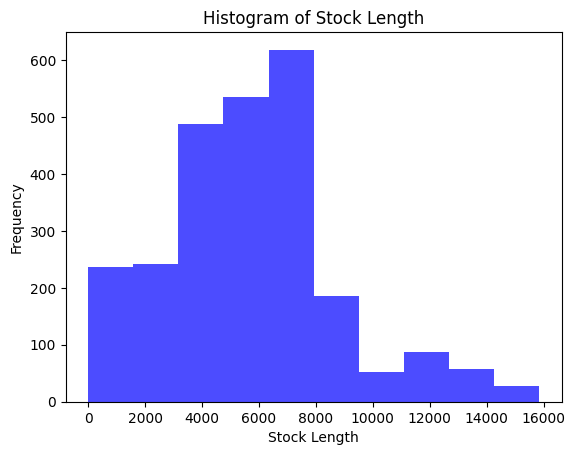

In [ ]:
stock_list = [s_p500_df,chinese_df,ftse_df,nse_df]
plot_stock_len(stock_list)

In [ ]:
extract_stock_less_7k()
clip_stocks_upto_7k()
for df in [s_p500_df_2,chinese_df_2,ftse_df_2,nse_df_2]:
    drop_duplicate_columns(df)

S&P stocks to remove -  197  LEFT- 321
Chinese stocks to remove -  284  LEFT- 5
FTSE stocks to remove -  35  LEFT- 65
NSE stocks to remove -  1119  LEFT- 503
stocks remaining -  321
stocks remaining -  5
stocks remaining -  65
stocks remaining -  503
Duplicates- 0
remaining cols 321
Duplicates- 0
remaining cols 5
Duplicates- 0
remaining cols 65
Duplicates- 0
remaining cols 503


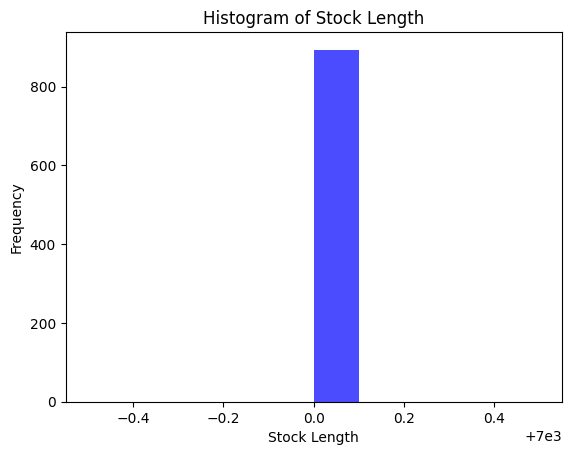

In [ ]:
stock_list = [s_p500_df_2,chinese_df_2,ftse_df_2,nse_df_2]
plot_stock_len(stock_list)

##### Create Input array

In [ ]:
#For input array
multiply_by = 100
create_org_array()
# data_augmentation(multiply_by)
multiply_X_data(multiply_by)
train_test_split_X_data(multiply_by,test_splitsize=0.2)
# print_input_array_size()

Original input array - (894, 7000)
Augmented input array - (89400, 7000)
Unormalized Train size: (71520, 7000)
Unormalized Validation size: (8940, 7000)
Unormalized Test size: (8940, 7000)


In [ ]:
scaling_X()
apply_noise_X_input(multiply_by)

In [ ]:
clip_X()

##### Create Output array

In [ ]:
#For output array
build_noiseless_Y_data(0.001,0,0.2,wavelet_name='db4')
merge_target()


In [ ]:
prepare_Y_data(multiply_by)


Unnormalized Output array- (89400, 7000)


In [ ]:
train_test_Y_split(multiply_by,test_splitsize=0.2)
scale_Y()

In [ ]:
print_output_array_size()

Train-> (71520, 7000)
Test-> (8940, 7000)
Val-> (8940, 7000)


In [ ]:
PATH="/content/drive/MyDrive/Research Papers/Paper 2/Code/TSA-Objectives/Without noise handling or transformation"
saved_file_name = "large_dataset_v1_16dec_normalized.npz"
save_train_test_array(PATH,saved_file_name)

In [ ]:
file_name1 = "large_dataset_v1_16dec_normalized.npz_X.npz"
file_name2 = "large_dataset_v1_16dec_normalized.npz_Y.npz"
load_train_test_array(drive_path, file_name1, file_name2)

##### Pytorch

In [ ]:
batchsize=32
prepare_tensor_data(batchsize)
model_no = 2
ker_size=9
stride=1
pad=3
dropout=0.5
patience=10
build_model(ker_size,stride,pad,dropout,patience,model_no,learn_rate=0.01)

cuda


###### Run 1 - without skip connections

In [ ]:
start_model_training(num_of_epochs=300)

Epoch [1/300], Train loss avg:0.0578725933790841, Val Loss(avg):0.013890245937252953, Learning rate--0.01
Epoch [2/300], Train loss avg:0.03892473576075219, Val Loss(avg):0.012717298571399208, Learning rate--0.0099
Epoch [3/300], Train loss avg:0.030214971391127464, Val Loss(avg):0.012083129736326508, Learning rate--0.009801
Epoch [4/300], Train loss avg:0.024984562389077026, Val Loss(avg):0.011583989742606625, Learning rate--0.00970299
Epoch [5/300], Train loss avg:0.02166398588885018, Val Loss(avg):0.011277759554243441, Learning rate--0.0096059601
Epoch [6/300], Train loss avg:0.019241607177289243, Val Loss(avg):0.0109010911665036, Learning rate--0.009509900499
Epoch [7/300], Train loss avg:0.017612780466120928, Val Loss(avg):0.010803200213743721, Learning rate--0.00941480149401
Epoch [8/300], Train loss avg:0.016383926255351053, Val Loss(avg):0.010690217691678869, Learning rate--0.0093206534790699
Epoch [9/300], Train loss avg:0.01549719271666192, Val Loss(avg):0.010467358355773455,

###### Run 2 - without validation and with skip connections

In [ ]:
start_model_training(num_of_epochs=300)

Epoch [1/300], Train loss avg:229702.62275598405, Learning rate--0.005929664464014994
Epoch [2/300], Train loss avg:177901.16849235373, Learning rate--0.0058703678193748445
Epoch [3/300], Train loss avg:148351.42333776597, Learning rate--0.005811664141181096
Epoch [4/300], Train loss avg:125533.23395113031, Learning rate--0.0057535474997692845
Epoch [5/300], Train loss avg:105152.63010305852, Learning rate--0.005696012024771591
Epoch [6/300], Train loss avg:83078.00980718085, Learning rate--0.005639051904523875
Epoch [7/300], Train loss avg:69471.2348778258, Learning rate--0.005582661385478636
Epoch [8/300], Train loss avg:59185.90278839761, Learning rate--0.0055268347716238495
Epoch [9/300], Train loss avg:50449.79859749003, Learning rate--0.005471566423907611
Epoch [10/300], Train loss avg:35633.40595703125, Learning rate--0.005416850759668535
Epoch [11/300], Train loss avg:30753.894944730717, Learning rate--0.005362682252071849
Epoch [12/300], Train loss avg:27889.874763131647, Lear

In [ ]:
model_name = "denoising_autoencoder_model_R2_Func_13dec_Ver3.pth"
PATH = f"/content/drive/MyDrive/Research Papers/Paper 2/Code/TSA-Objectives/Without noise handling or transformation/{model_name}"
save_model(PATH)

In [ ]:
load_model(PATH,2,0.01)

In [ ]:
# start_model_training(num_of_epochs=100)

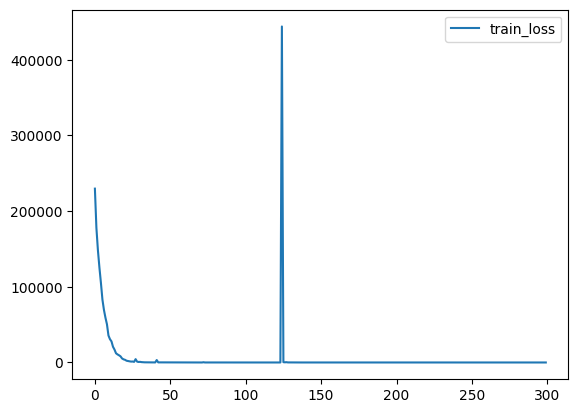

In [ ]:
plot_losses()

In [ ]:
calculate_metrics()

**********************Test data Metrics***************************
Mean Absolute Percentage Error (MAPE): 15.91%
Mean Absolute Error (MAE): 267.69
Root Mean Squared Error (RMSE): 750.96
R2 Score: 0.56


In [ ]:
print_model_summary()

###### Run 3 - with validation and skip connections

In [ ]:
start_model_training_val(300)

Epoch [1/300], Train loss avg:0.005100392308482464, Val Loss(avg):0.004050506235463387, Learning rate--0.0002907960468580268
Epoch [2/300], Train loss avg:0.0051112145715531835, Val Loss(avg):0.00404009959360553, Learning rate--0.0002907960468580268
Epoch [3/300], Train loss avg:0.005093320054398414, Val Loss(avg):0.003985484183955369, Learning rate--0.0002907960468580268
Epoch [4/300], Train loss avg:0.005088591829259345, Val Loss(avg):0.004016014747321606, Learning rate--0.0002907960468580268
Epoch [5/300], Train loss avg:0.005081252202867193, Val Loss(avg):0.003986840840760555, Learning rate--0.0002907960468580268
Epoch [6/300], Train loss avg:0.005077193784428404, Val Loss(avg):0.0039938783896613424, Learning rate--0.0002907960468580268
Epoch [7/300], Train loss avg:0.0050674784319237505, Val Loss(avg):0.003985825600497172, Learning rate--0.0002907960468580268
Epoch [8/300], Train loss avg:0.0050641866623760854, Val Loss(avg):0.003964069490794534, Learning rate--0.00029079604685802

KeyboardInterrupt: 

In [ ]:
drive_path="/content/drive/MyDrive/Research Papers/Paper 2/Code/TSA-Objectives/Without noise handling or transformation"

file_name1 = "large_dataset_v1_16dec_normalized.npz_X.npz"
file_name2 = "large_dataset_v1_16dec_normalized.npz_Y.npz"
load_train_test_array(drive_path, file_name1, file_name2)

X loaded
Y loaded


In [ ]:
batchsize=32

model_no = 2
ker_size=9
stride=1
pad=3
dropout=0.5
patience=10
prepare_tensor_data(batchsize)


In [ ]:
build_model(ker_size,stride,pad,dropout,patience,model_no,learn_rate=0.01)

cuda


In [ ]:
num_of_epochs=300
start_model_training_val(num_of_epochs)

Epoch [1/300], Train loss avg:2728.482047613597, Val Loss(avg):0.0115707198124645, Learning rate--0.01
Epoch [2/300], Train loss avg:0.01866210851301616, Val Loss(avg):0.011585989642688739, Learning rate--0.0099
Epoch [3/300], Train loss avg:0.015600889803679198, Val Loss(avg):0.011043467598834207, Learning rate--0.009801
Epoch [4/300], Train loss avg:0.01423176763250057, Val Loss(avg):0.010730267973018012, Learning rate--0.00970299
Epoch [5/300], Train loss avg:0.013318909655931412, Val Loss(avg):0.010352770965878985, Learning rate--0.0096059601
Epoch [6/300], Train loss avg:0.012348152535823768, Val Loss(avg):0.009996836961779212, Learning rate--0.009509900499
Epoch [7/300], Train loss avg:0.011507137591056775, Val Loss(avg):0.009529181965626776, Learning rate--0.00941480149401
Epoch [8/300], Train loss avg:0.010761104210569488, Val Loss(avg):0.009107192025320338, Learning rate--0.0093206534790699
Epoch [9/300], Train loss avg:0.00985977418316524, Val Loss(avg):0.008581171933162426, 

KeyboardInterrupt: 

In [ ]:
num_of_epochs=300
start_model_training_val(num_of_epochs)

Epoch [1/300], Train loss avg:0.19264230607254576, Val Loss(avg):0.004318721311366452, Learning rate--0.01
Epoch [2/300], Train loss avg:0.004427676456636631, Val Loss(avg):0.0038848403225918964, Learning rate--0.0099
Epoch [3/300], Train loss avg:0.0036654486764176545, Val Loss(avg):0.0031256168436292293, Learning rate--0.009801
Epoch [4/300], Train loss avg:367921.7737844173, Val Loss(avg):916.9914683750698, Learning rate--0.00970299
Epoch [5/300], Train loss avg:1286.16826240147, Val Loss(avg):240.16255356924876, Learning rate--0.0096059601
Epoch [6/300], Train loss avg:377.5372130118761, Val Loss(avg):104.86450178963797, Learning rate--0.009509900499
Epoch [7/300], Train loss avg:176.02793873695185, Val Loss(avg):49.14082521711077, Learning rate--0.00941480149401
Epoch [8/300], Train loss avg:86.8566188155138, Val Loss(avg):32.476681988579884, Learning rate--0.0093206534790699
Epoch [9/300], Train loss avg:54.6774798382582, Val Loss(avg):13.896757578849792, Learning rate--0.0092274

In [ ]:
PATH="/content/drive/MyDrive/Research Papers/Paper 2/Code/TSA-Objectives/Without noise handling or transformation"

In [ ]:
model_name = "Pytorch_Large_300_17dec.pth"
save_py_model(f'{PATH}/{model_name}')

RETRAIN

In [ ]:
mount_drive()

Mounted at /content/drive


In [ ]:
drive_path="/content/drive/MyDrive/Research Papers/Paper 2/Code/TSA-Objectives/Without noise handling or transformation"

file_name1 = "large_dataset_v1_16dec_normalized.npz_X.npz"
file_name2 = "large_dataset_v1_16dec_normalized.npz_Y.npz"
load_train_test_array(drive_path, file_name1, file_name2)

X loaded
Y loaded


In [ ]:
batchsize=32
model_no = 2
ker_size=9
stride=1
pad=3
dropout=0.5
patience=10
retrain=True
learn_rate=0.01
model_name = "Pytorch_Large_300_17dec.pth"
# prepare_tensor_data(batchsize)
build_model(ker_size,stride,pad,dropout,patience,model_no,retrain,drive_path,model_name,learn_rate)

cuda


In [ ]:
# load_model_py(f'{PATH}/{model_name}')

In [ ]:
num_of_epochs=30
start_model_training_val(num_of_epochs)

Epoch [1/30], Train loss avg:0.004150179636058391, Val Loss(avg):0.004078661376843229, Learning rate--0.0004904089407128574
Epoch [2/30], Train loss avg:0.006418439982171426, Val Loss(avg):0.003937787225835824, Learning rate--0.00048550485130572886
Epoch [3/30], Train loss avg:0.003922256158760663, Val Loss(avg):0.003883063202790384, Learning rate--0.00048064980279267157
Epoch [4/30], Train loss avg:0.00380400228407859, Val Loss(avg):0.0037503029909982744, Learning rate--0.00047584330476474484
Epoch [5/30], Train loss avg:0.008232363703258552, Val Loss(avg):0.005935633449449337, Learning rate--0.0004710848717170974
Epoch [6/30], Train loss avg:0.005498747188197886, Val Loss(avg):0.0042635189943082095, Learning rate--0.00046637402299992643
Epoch [7/30], Train loss avg:0.0042361951613344535, Val Loss(avg):0.0041007421087540154, Learning rate--0.00046171028276992715
Epoch [8/30], Train loss avg:0.003916235264886579, Val Loss(avg):0.0037912416754157414, Learning rate--0.0004570931799422279

In [ ]:
model_name = "Pytorch_Large_330_18dec.pth"
save_py_model(f'{drive_path}/{model_name}')

In [ ]:
# prompt: plot dataframe with two columns train_loss and val_loss in the same plot. Plot using plotly and also show x and y ticks

import plotly.graph_objects as go

fig = go.Figure()

# Add traces for train_loss and val_loss
fig.add_trace(go.Scatter(y=history_cnn.history['loss'], mode='lines', name='train_loss'))
fig.add_trace(go.Scatter(y=history_cnn.history['val_loss'], mode='lines', name='val_loss'))

# Customize the plot
fig.update_layout(title='Training and Validation Loss',
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

# Show x and y ticks
fig.update_xaxes(showticklabels=True)
fig.update_yaxes(showticklabels=True)

fig.show()

In [ ]:
plot_losses_py("Pytorch autoencoder loss data - Final.csv")

###### Evaluate on test set - Run 3

In [ ]:
calculate_metrics_Py(model)

##### Tensorflow

###### Run 4 - tensorflow - small dataset

In [ ]:
final_train_X.shape[1]

7000

In [ ]:
feature_length=final_train_X.shape[1]
# input_sh = (Timesteps, features)
input_shape = (feature_length,1)
latent_vec_dim = 16
ker_size=9
stride=1
dropout=0.5
opt='adam'
loss_fn='mean_squared_error' #'huber_loss'
pad='same'
epoch=200
batchsize=32
learning_rate=0.001
weight_decay=1e-4
activation_fn='relu'
model_def_TF(input_shape, latent_vec_dim, ker_size,stride , dropout,
                  opt, loss_fn, pad, epoch,
                  batchsize, learning_rate, weight_decay,activation_fn)

Epoch 1/200
470/470 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 2/200
470/470 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 3/200
470/470 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 4/200
470/470 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 5/200
470/470 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 6/200
470/470 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 7/200
470/470 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 8/200
470/470 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 9/200
470/470 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 10/200
470/470 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 11/200
470/470 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 12/200
470/47

In [ ]:
# mount_drive()
PATH="/content/drive/MyDrive/Research Papers/Paper 2/Code/TSA-Objectives/Without noise handling or transformation"
save_tf_model(PATH)

In [ ]:
save_history_tf(PATH)

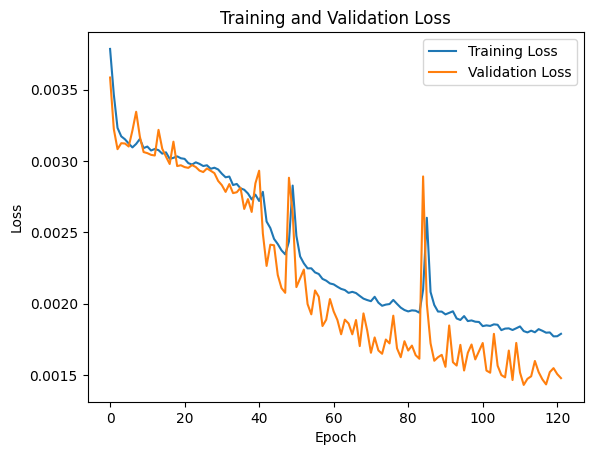

In [ ]:
plot_losses_tf()

In [ ]:
# Assuming cnn_model is defined and loaded as a Keras model
cnn_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 7000, 1)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_27 (Conv1D)        │ (None, 7000, 128)      │          1,280 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_50 (Dropout)      │ (None, 7000, 128)      │              0 │ conv1d_27[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_28 (Conv1D)        │ (None, 7000, 64)       │         73,792 │ dropout_50[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_51 (Dropout)      │ (None, 7000, 64)       │              0 │ conv1d_28[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_29 (Conv1D)        │ (None, 7000, 32)       │         18,464 │ dropout_51[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_9           │ (None, 7000, 32)       │              0 │ conv1d_29[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_52 (Dropout)      │ (None, 7000, 32)       │              0 │ max_pooling1d_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Encoder (Dense)           │ (None, 7000, 16)       │            528 │ dropout_52[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_23       │ (None, 7000, 32)       │          4,640 │ Encoder[0][0]          │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_53 (Dropout)      │ (None, 7000, 32)       │              0 │ conv1d_transpose_23[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_24       │ (None, 7000, 64)       │         18,496 │ dropout_53[0][0]       │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_54 (Dropout)      │ (None, 7000, 64)       │              0 │ conv1d_transpose_24[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_16 (Add)              │ (None, 7000, 64)       │              0 │ dropout_54[0][0],      │
│                           │                        │                │ dropout_51[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_25       │ (None, 7000, 128)      │         73,856 │ add_16[0][0]           │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_55 (Dropout)      │ (None, 7000, 128)      │              0 │ conv1d_transpose_25[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_17 (Add)         

 Total params: 576,629 (2.20 MB)

 Trainable params: 192,209 (750.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 384,420 (1.47 MB)

In [ ]:
calculate_metrics_tf(cnn_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

###### Run 5 - Large dataset and seperate val and test set

In [ ]:
final_train_Y.shape

(71520, 7000)

In [ ]:
feature_length=final_train_X.shape[1]
# input_sh = (Timesteps, features)
input_shape = (feature_length,1)
latent_vec_dim = 16
ker_size=9
stride=1
dropout=0.5
opt='adam'
loss_fn='mean_squared_error' #'huber_loss'
pad='same'
epoch=300
batchsize=32
learning_rate=0.001
weight_decay=1e-4
activation_fn='relu'
model_def_TF(input_shape, latent_vec_dim, ker_size,stride , dropout,
                  opt, loss_fn, pad, epoch,
                  batchsize, learning_rate, weight_decay,activation_fn)

Epoch 1/300
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 2/300
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 3/300
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 4/300
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 5/300
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 6/300
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 7/300
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 8/300
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 9/300
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 10/300
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 11/300
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - loss: 0.0068 - val_loss: 0.00

In [ ]:
# mount_drive()
PATH="/content/drive/MyDrive/Research Papers/Paper 2/Code/TSA-Objectives/Without noise handling or transformation"

model_name = "TF_Large_denoised_V2.keras"
save_tf_model(PATH,model_name)

In [ ]:
save_history_tf(PATH,model_name)

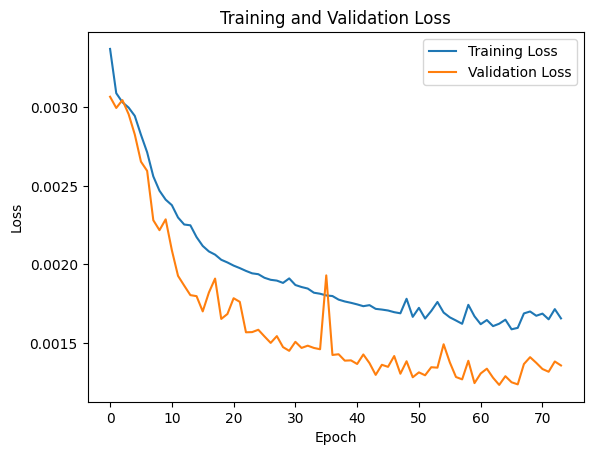

In [ ]:
plot_losses_tf()

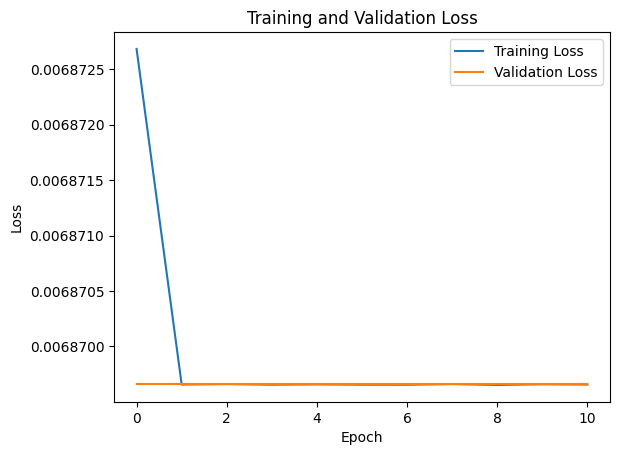

In [ ]:
plot_losses_tf()

In [ ]:
# Assuming cnn_model is defined and loaded as a Keras model
cnn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 7000, 1)        │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 7000, 128)      │          1,280 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 7000, 128)      │              0 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 7000, 64)       │         73,792 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 7000, 64)       │              0 │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 7000, 32)       │         18,464 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 7000, 32)       │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 7000, 32)       │              0 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Encoder (Dense)           │ (None, 7000, 16)       │            528 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose          │ (None, 7000, 32)       │          4,640 │ Encoder[0][0]          │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 7000, 32)       │              0 │ conv1d_transpose[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_1        │ (None, 7000, 64)       │         18,496 │ dropout_3[0][0]        │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 7000, 64)       │              0 │ conv1d_transpose_1[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 7000, 64)       │              0 │ dropout_4[0][0],       │
│                           │                        │                │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_2        │ (None, 7000, 128)      │         73,856 │ add[0][0]              │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 7000, 128)      │              0 │ conv1d_transpose_2[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 7000, 128)      │              0 │ dropout_5[0][0],       │
│                      

 Total params: 576,629 (2.20 MB)

 Trainable params: 192,209 (750.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 384,420 (1.47 MB)

In [ ]:
cnn_loaded_model = load_model_tf(PATH,model_name)

In [ ]:
# Evaluate model with verbose=0
loss, acc = cnn_loaded_model.evaluate(final_test_X, final_test_Y, verbose=0)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
calculate_metrics_tf(cnn_loaded_model)

## Filter using autoencoder

### load model

In [ ]:
def load_model(drive_path,model_name):
  batchsize=32
  model_no = 2
  ker_size=9
  stride=1
  pad=3
  dropout=0.5
  patience=10
  retrain=True
  learn_rate=0.01
  # model_name = "Pytorch_Large_330_18dec.pth"
  # prepare_tensor_data(batchsize)
  predict=True
  build_model(ker_size,stride,pad,dropout,patience,model_no,retrain,drive_path,model_name,learn_rate,predict)

### Normalize data

In [ ]:
def scale_data(raw_data):
  global scaled_data, scaler
  scaler = preprocessing.MinMaxScaler()
  raw_data = raw_data.reshape(raw_data.shape[0],1)
  scaled_data = scaler.fit_transform(raw_data)
  scaled_data = scaled_data.reshape(-1)

### Predict(filter noise) using autoencoder

In [ ]:
def predict_denoised_data(data):
  global scaler
  input_tensor = torch.tensor(data, dtype=torch.float32).unsqueeze(0).to(device)

  # Make predictions
  py_model.eval()
  with torch.no_grad():
      predictions = py_model(input_tensor)

  # Convert predictions back to a NumPy array if needed
  predictions_np = predictions.cpu().numpy()
  raw_output = scaler.inverse_transform(predictions_np)
  return raw_output

### Calcluate metrics

In [ ]:
def cal_metrics(actual_data,pred_data):
  all_predictions = np.array(pred_data)  # Concatenate predictions
  all_actual = np.array(actual_data)  # Concatenate actual values

  # Calculate metrics
  rmse = np.sqrt(mean_squared_error(all_actual, all_predictions))
  mape = np.mean(np.abs((all_actual - all_predictions) / all_actual)) * 100
  mae = mean_absolute_error(all_actual, all_predictions)
  r2 = r2_score(all_actual, all_predictions)

  # Print the metrics
  print(f"**********************Test data Metrics-{ticker}***************************")
  print(f"RMSE: {rmse:.4f}")
  print(f"MAPE: {mape:.4f}%")
  print(f"MAE: {mae:.4f}")
  print(f"R2 Score: {r2:.4f}")

### Save filtered data

In [ ]:
def save_filtered_data(ticker,org_data,filtered_data):
  df = pd.DataFrame({'org_data':org_data,'filtered_data': filtered_data})
  df.to_csv(f"{ticker}_autoencoder_data.csv",index=True)
  print("Saved")

### Compile all functions

In [ ]:
mount_drive()

Mounted at /content/drive


In [ ]:
drive_path = "/content/drive/MyDrive/Research Papers/Paper 2/Code/TSA-Objectives/Without noise handling or transformation"
model_name = "Pytorch_Large_330_18dec.pth"
load_model(drive_path,model_name)

cuda


In [ ]:
py_model

Denoising_Autoencoder_2(
  (enc_conv1): Conv1d(1, 256, kernel_size=(9,), stride=(1,), padding=(3,))
  (enc_conv2): Conv1d(256, 128, kernel_size=(9,), stride=(1,), padding=(3,))
  (enc_conv3): Conv1d(128, 64, kernel_size=(9,), stride=(1,), padding=(3,))
  (enc_conv4): Conv1d(64, 32, kernel_size=(9,), stride=(1,), padding=(3,))
  (enc_conv5): Conv1d(32, 16, kernel_size=(9,), stride=(1,), padding=(3,))
  (dec_conv1): ConvTranspose1d(16, 32, kernel_size=(9,), stride=(1,), padding=(3,))
  (dec_conv2): ConvTranspose1d(32, 64, kernel_size=(9,), stride=(1,), padding=(3,))
  (dec_conv3): ConvTranspose1d(64, 128, kernel_size=(9,), stride=(1,), padding=(3,))
  (dec_conv4): ConvTranspose1d(128, 256, kernel_size=(9,), stride=(1,), padding=(3,))
  (dec_conv5): ConvTranspose1d(256, 1, kernel_size=(9,), stride=(1,), padding=(3,))
  (dropout): Dropout(p=0.5, inplace=False)
  (leakyrelu): LeakyReLU(negative_slope=0.01)
)

##### AKAM

In [ ]:
ticker="AKAM"
akam_prices = fetch_stock_data(ticker)
scale_data(akam_prices['Close'].values)

In [ ]:
len(akam_prices)

6336

In [ ]:
if len(scaled_data) < 7000:
  print("Not enough data")
  scaled_data = np.concatenate((np.zeros(7000-len(scaled_data), dtype=int),scaled_data))
else:
  scaled_data = scaled_data[-7000:]
AKAM_filtered_output = predict_denoised_data(scaled_data)

Not enough data


In [ ]:
len(scaled_data)

7000

In [ ]:
AKAM_filtered_output

array([[-25.006237, -19.967108, -15.143047, ..., -13.524512, -18.24138 ,
        -23.356115]], dtype=float32)

In [ ]:
len(AKAM_filtered_output[0])

7000

In [ ]:
AKAM_filtered_output.shape

(1, 7000)

In [ ]:
cal_metrics(akam_prices['Close'].values,AKAM_filtered_output[0][-len(akam_prices['Close']):])

**********************Test data Metrics-AKAM***************************
RMSE: 64.8832
MAPE: 113.3016%
MAE: 54.5054
R2 Score: -1.4511


In [ ]:
save_filtered_data("AKAM",akam_prices['Close'],AKAM_filtered_output[0][-len(akam_prices['Close']):])

Saved


##### MMM

In [ ]:
ticker="MMM"
mmm_prices = fetch_stock_data(ticker)
scale_data(mmm_prices['Close'][-7000:].values)

In [ ]:
len(mmm_prices)

15861

In [ ]:
len(scaled_data)

7000

In [ ]:
MMM_filtered_output = predict_denoised_data(scaled_data)

In [ ]:
MMM_filtered_output

array([[1.7891315, 4.159135 , 6.428029 , ..., 8.263554 , 5.835061 ,
        3.2000468]], dtype=float32)

In [ ]:
len(MMM_filtered_output[0])

7000

In [ ]:
MMM_filtered_output.shape

(1, 7000)

In [ ]:
type(MMM_filtered_output)

numpy.ndarray

In [ ]:
cal_metrics(mmm_prices['Close'][-7000:].values,MMM_filtered_output[0])

**********************Test data Metrics-MMM***************************
RMSE: 48.1519
MAPE: 60.0332%
MAE: 39.1206
R2 Score: -0.3896


In [ ]:
save_filtered_data("MMM",mmm_prices['Close'][-7000:],MMM_filtered_output[0])

Saved


##### AMD

In [ ]:
ticker="AMD"
amd_prices = fetch_stock_data(ticker)
scale_data(amd_prices['Close'][-7000:].values)

In [ ]:
len(amd_prices)

11296

In [ ]:
len(scaled_data)

7000

In [ ]:
AMD_filtered_output = predict_denoised_data(scaled_data[-7000:])

In [ ]:
AMD_filtered_output

array([[-14.815749 , -11.563552 ,  -8.449797 , ...,  -6.744842 ,
         -9.9226265, -13.3745365]], dtype=float32)

In [ ]:
len(AMD_filtered_output[0])

7000

In [ ]:
AMD_filtered_output.shape

(1, 7000)

In [ ]:
type(AMD_filtered_output)

numpy.ndarray

In [ ]:
cal_metrics(amd_prices['Close'][-7000:].values,AMD_filtered_output[0])

**********************Test data Metrics-AMD***************************
RMSE: 40.0497
MAPE: 99.6452%
MAE: 25.5431
R2 Score: -0.0473


In [ ]:
save_filtered_data("AMD",amd_prices['Close'][-7000:],AMD_filtered_output[0])

Saved


## ROUGH

freq- [ 0.          0.00035997  0.00071994 ... -0.00107991 -0.00071994
 -0.00035997]
amp- [312166.39230347  92834.39800532  77250.32366776 ...  22657.49907488
  77250.32366776  92834.39800532]


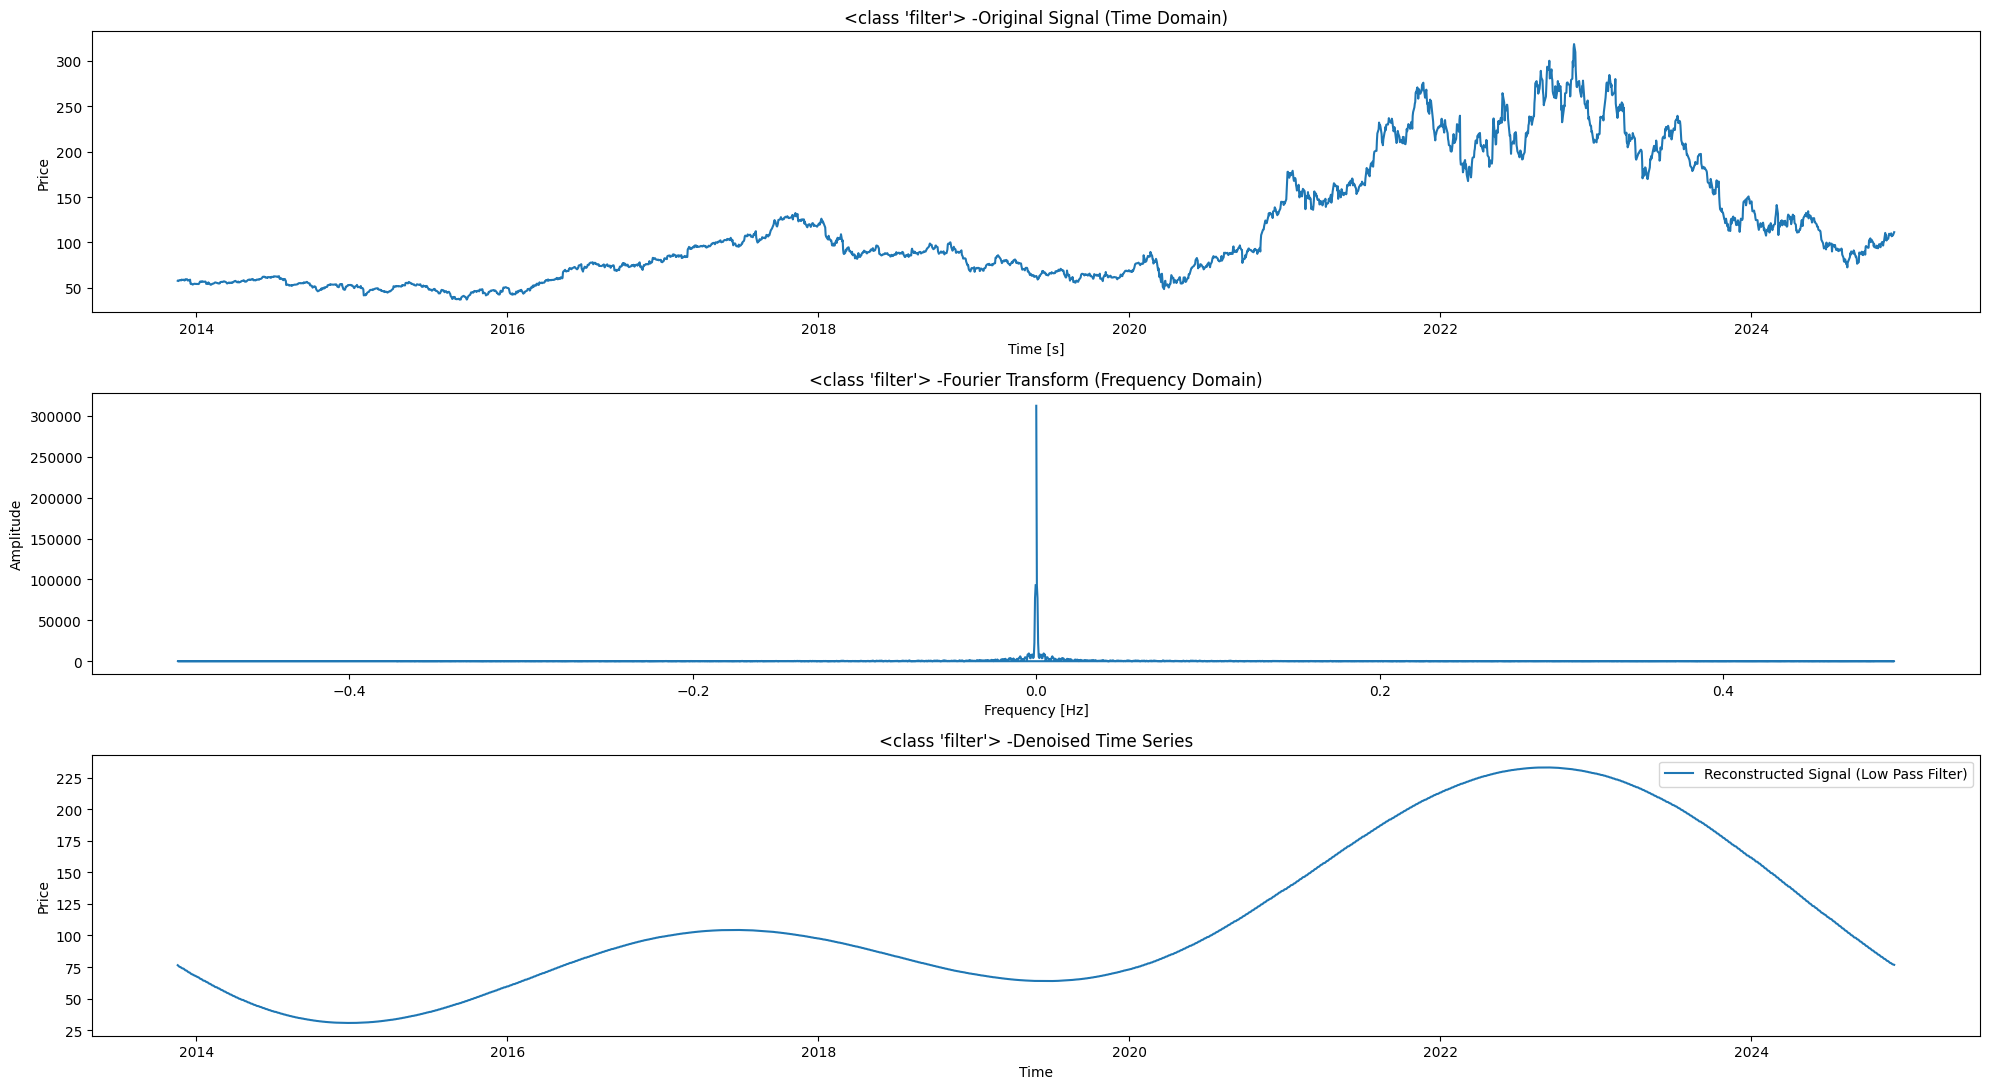

In [ ]:
c_df = fourier_transform(c,c['Close'][-len(d):])

freq- [ 0.          0.00035997  0.00071994 ... -0.00107991 -0.00071994
 -0.00035997]
amp- [137239.48540306  19634.63093954  18331.69561101 ...   9499.93959492
  18331.69561101  19634.63093954]


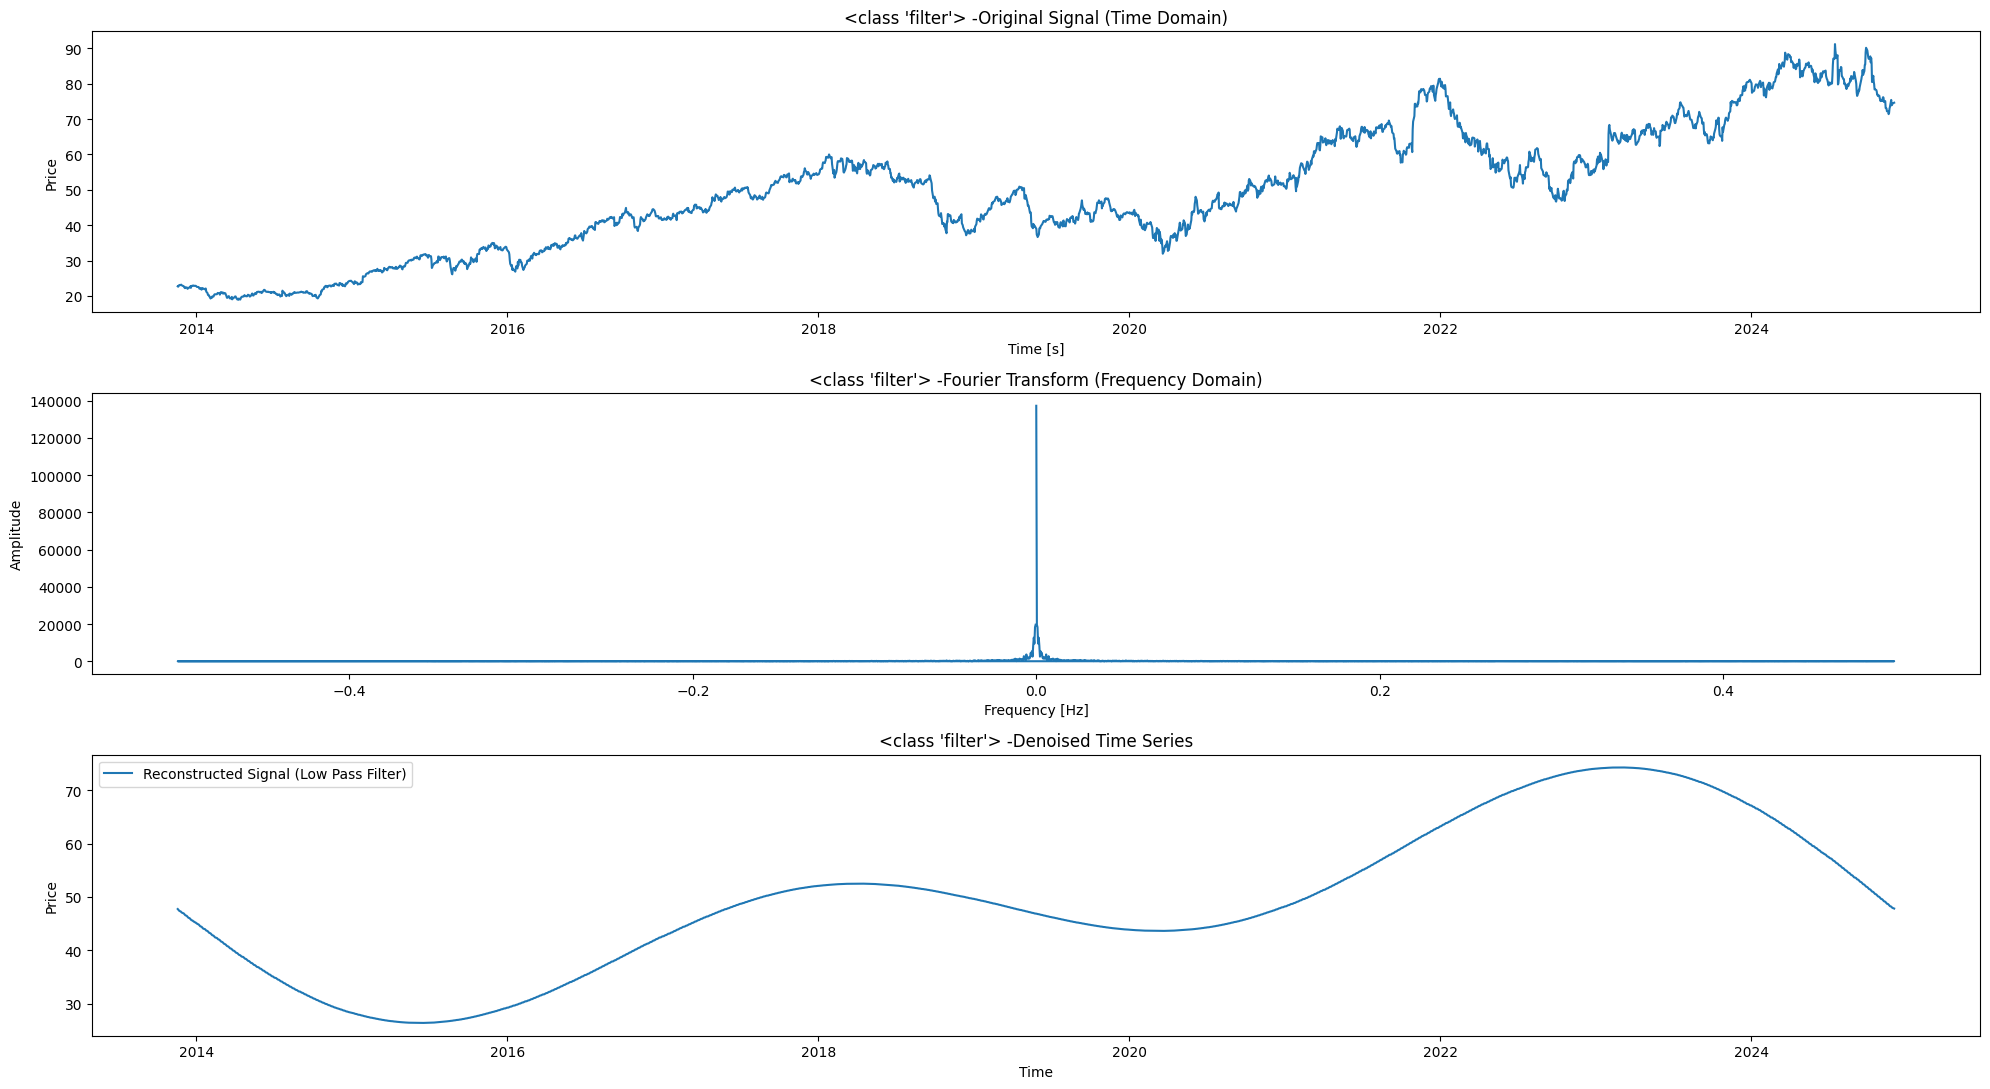

In [ ]:
b_df = fourier_transform(b,b['Close'][-len(d):])

freq- [ 0.          0.00035997  0.00071994 ... -0.00107991 -0.00071994
 -0.00035997]
amp- [129391.00086784  27377.70959477  15472.44454104 ...   5460.52222083
  15472.44454104  27377.70959477]


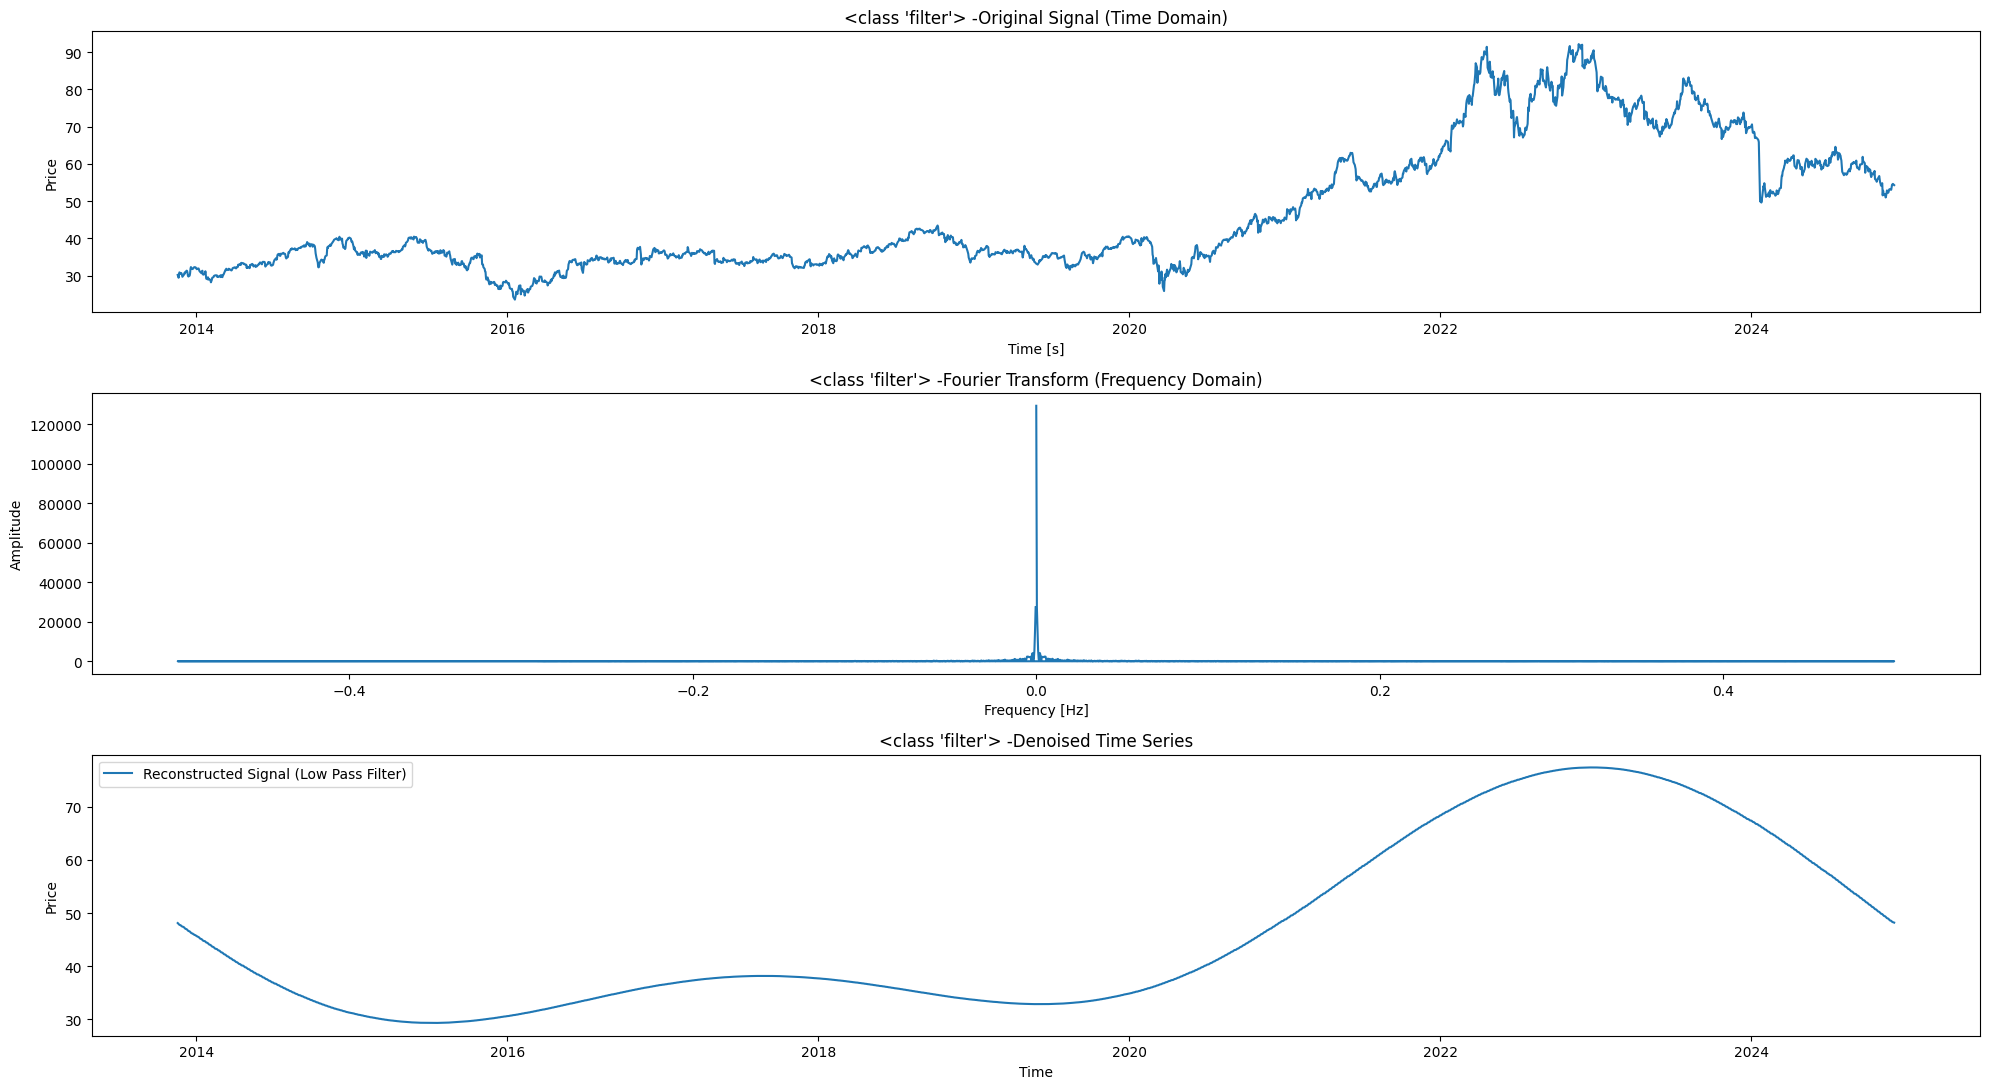

In [ ]:
a_df = fourier_transform(a,a['Close'][-len(d):])

In [ ]:
def fourier_transform(df,org_data):
    global frequencies,fourier_reconstructed_signal,fft_values
    # calcualte the fourier transform
    fft_values = np.fft.fft(org_data)

    # plot the original signal
    plt.figure(figsize=(20,11))
    plt.subplot(3, 1, 1)
    plt.plot(df.index[-len(d):], org_data)
    plt.title(f'{filter} -Original Signal (Time Domain)')
    plt.xlabel('Time [s]')
    plt.ylabel('Price')

    # plot the fourier transform of the simulated sequence
    frequencies = np.fft.fftfreq(len(df.index[-len(d):]), d=1)
    print("freq-",frequencies)
    print("amp-",np.abs(fft_values))
    plt.subplot(3, 1, 2)
    plt.plot(frequencies, np.abs(fft_values))
    plt.title(f'{filter} -Fourier Transform (Frequency Domain)')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')


    # Step 2: Filter High Frequencies (Denoising)
    threshold = 0.001 #0.2, 0.1, 0.05, 0.01, 0.005, 0.001
    # Filter threshold: keep only low frequencies
    fft_filtered = np.copy(fft_values)
    fft_filtered[np.abs(frequencies) > threshold] = 0 # Zero out high frequencies
    # Reconstruct the Signal (Inverse Fourier Transform)
    fourier_reconstructed_signal = np.fft.ifft(fft_filtered).real

    # Plot Reconstructed Signal
    plt.subplot(3, 1, 3)
    plt.plot(df.index[-len(d):], fourier_reconstructed_signal, label="Reconstructed Signal (Low Pass Filter)")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title(f"{filter} -Denoised Time Series")
    plt.legend()
    plt.tight_layout()
    plt.show()

    fourier_df = pd.DataFrame({'filtered': fourier_reconstructed_signal})
    return fourier_df

In [ ]:
train_series_noisy

array([[30.16546630859375, 30.187570571899414, 29.399166107177734, ...,
        54.369998931884766, 54.599998474121094, 54.27000045776367],
       [22.693307876586914, 22.583473205566406, 22.727094650268555, ...,
        74.0999984741211, 74.48999786376953, 74.6500015258789],
       [57.756168365478516, 57.50813293457031, 57.54235076904297, ...,
        107.9800033569336, 107.69999694824219, 111.30000305175781],
       [43.411842346191406, 41.01202392578125, 39.98225402832031, ...,
        141.41000366210938, 140.83999633789062, 140.39999389648438],
       [38.180294036865234, 38.03992462158203, 37.634422302246094, ...,
        77.13999938964844, 76.87999725341797, 76.01000213623047]],
      dtype=object)

In [ ]:
train_series_noisy.shape

(5, 2778)

In [ ]:
#calculate the 25 50 and 75 percentiles of close values of a
a_x = a['Close'].quantile(0.25)
a_y = a['Close'].quantile(0.5)
a_z = a['Close'].quantile(0.75)

In [ ]:
#calculate variance

def variance_cal(d_points):
    #calcuate mean
    mean = np.mean(d_points)
    variance = sum((x - mean) ** 2 for x in d_points) / len(d_points)
    print("Variance: ", variance)
    return variance


In [ ]:
variance_cal(a['Close'])

Variance:  375.3685639428897


375.3685639428897

In [ ]:
variance_cal(a_df['filtered'])

Variance:  256.29107927886633


256.29107927886633

In [ ]:

import plotly.graph_objects as px
import numpy as np


# creating random data through randomint
# function of numpy.random
np.random.seed(42)

random_x1= np.random.randint(1,101,100)
random_x2= np.random.randint(1,101,100)

x = ['A', 'B', 'C', 'D']

#change figure size of plotly chart

plot = px.Figure()

plot.add_trace(px.Box(y=a_df['filtered'].values,name="filtered Close"))
plot.add_trace(px.Box(y=a['Close'].values,name="Close"))

plot.show()


/tmp/ipykernel_5468/1596747935.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([a['Close'][:2000].values], labels=['Close'])


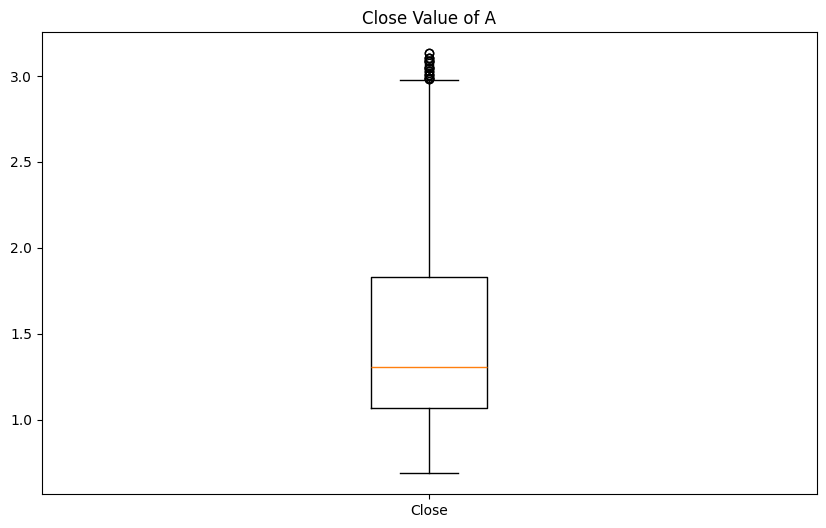

In [ ]:
# box plot of close value of a
plt.figure(figsize=(10,6))
plt.boxplot([a['Close'][:2000].values], labels=['Close'])
plt.title('Close Value of A')
plt.show()


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Load the MNIST dataset
(train_images, _), (test_images, _) = mnist.load_data()

###########################
# Feedforward Autoencoder #
###########################

# Reshape data for the dense layer input
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

# Scale the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Add Gaussian noise to the data
noise = np.random.normal(loc=0.0, scale=0.7, size=train_images.shape)
train_images_noisy = train_images + noise

noise = np.random.normal(loc=0.0, scale=0.7, size=test_images.shape)
test_images_noisy = test_images + noise

# Clip the noisy data by 0 and 1:
# This is because adding noise may push the normalized pixel values
# into invalid values of less than 0 or greater than 1
# So, we need to clip pixel values greater than 1 to 1.0 and
# less than 0 to 0.0
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

latent_vec_dim = 16
input_dim = len(d)

In [ ]:

latent_vec_dim = 16
input_dim = len(d)

In [ ]:
len(d)

2778

In [ ]:
train_series_noisy[:3].shape

(3, 2778)

In [ ]:
train_series_noisy

array([[30.16546630859375, 30.187570571899414, 29.399166107177734, ...,
        54.369998931884766, 54.599998474121094, 54.27000045776367],
       [22.693307876586914, 22.583473205566406, 22.727094650268555, ...,
        74.0999984741211, 74.48999786376953, 74.6500015258789],
       [57.756168365478516, 57.50813293457031, 57.54235076904297, ...,
        107.9800033569336, 107.69999694824219, 111.30000305175781],
       [43.411842346191406, 41.01202392578125, 39.98225402832031, ...,
        141.41000366210938, 140.83999633789062, 140.39999389648438],
       [38.180294036865234, 38.03992462158203, 37.634422302246094, ...,
        77.13999938964844, 76.87999725341797, 76.01000213623047]],
      dtype=object)

In [ ]:
#normalize data points
# from sklearn import preprocessing
# normalized_arr = preprocessing.normalize(train_series_noisy)
# print(normalized_arr)

# normalize dataset with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_series_noisy_norm = scaler.fit_transform(train_series_noisy)

In [ ]:
train_series_noisy_norm.min()

0.0

In [ ]:
train_series_noisy[:3].shape

(3, 2778)

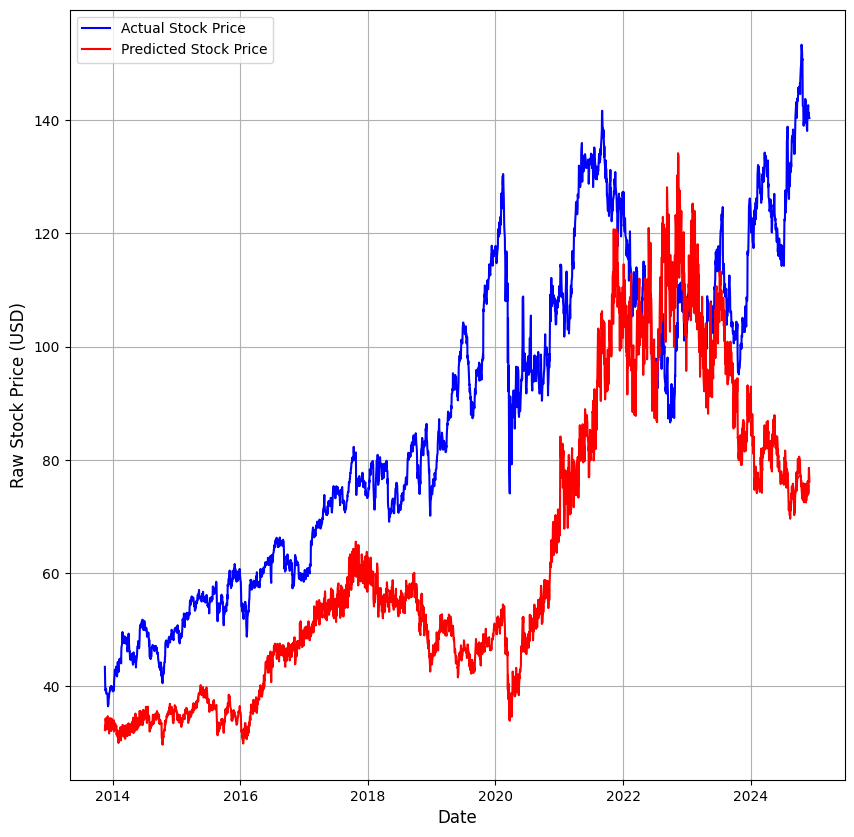

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(d.index[-len(d):],train_series_noisy[3], label=f"Actual Stock Price", color='blue')
plt.plot(d.index[-len(d):],trainpred[0], label=f"Predicted Stock Price", color='red')
# plt.title(title, fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Raw Stock Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()